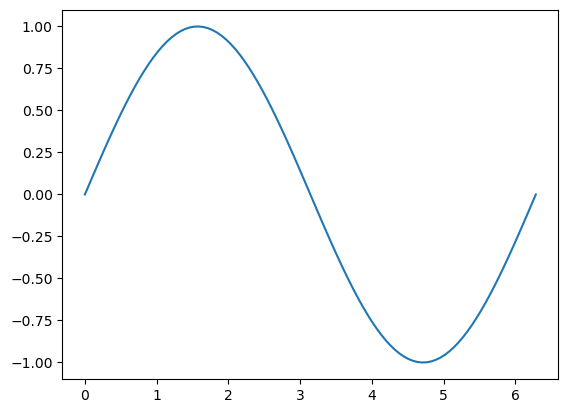

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

%matplotlib inline
plt.plot(x,y)

2
12
(3, 4)


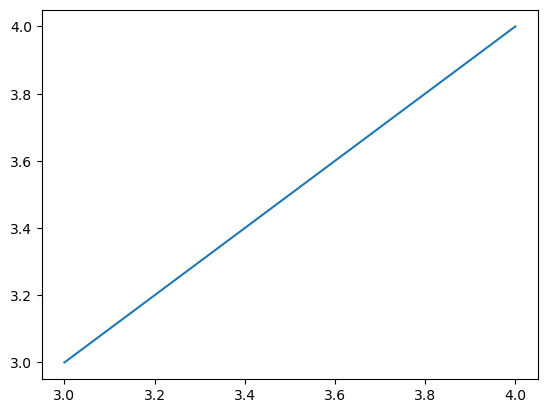

In [22]:
a = [[1,2,3,4],[21,23,24,25],[31,34,35,36]]
A =np.array(a)

# n.dim correspondes to number of dimension 
print(A.ndim)
# correspondes to no of row * no of colums
print(A.size)
# 3 is no of rows correspondes and 4 is correspondes to size of each nested list or no of column
print(A.shape)

x=A.shape
y=A.shape

plt.plot(x,y)

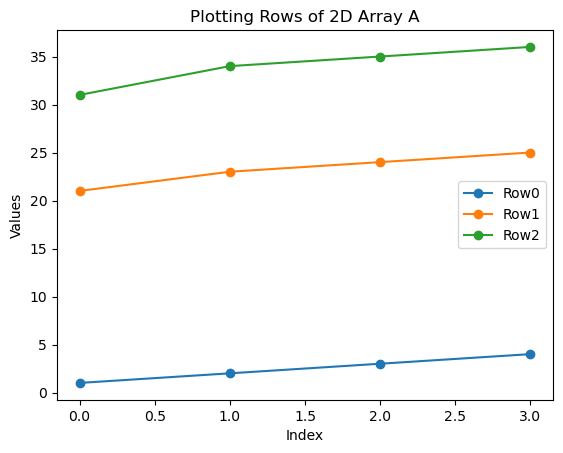

In [23]:
# Here is an example of how you can plot each row in A on the y-axis against an x-axis representing
# the index postions(1,2,3,4)

import numpy as np

import matplotlib.pyplot as plt

a = [[1,2,3,4],[21,23,24,25],[31,34,35,36]]
A =np.array(a)

#Create x values based on the length of each row in A
x = np.arange(A.shape[1]) 

#Now plot each row of A against x

for row in A:
    plt.plot(x, row, marker ='o',label =f'Row{np.where(A == row) [0][0]}')
    
#Add labels and title

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plotting Rows of 2D Array A')
plt.legend()

# Show the plot
plt.show()

# Explanation
# x = np.arange(A.shape[1]) creates a 1D array of x-values corresponding to the number of columns in A (since you have 4 elements in each row).
# The for loop iterates through each row of the array A and plots it against the x values.
# plt.plot(x, row) plots each row of the array against x.
# marker='o' adds a marker to each point in the graph, making the graph easier to visualize.
# plt.legend() helps by adding a label for each row so you can distinguish between them on the graph.

[1, 1]
[1 1]


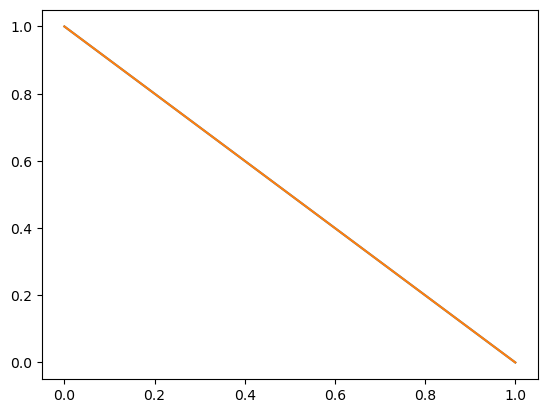

In [24]:
# VECTOR ADDITION AND SUBTRACTION

u= [1,0]
v= [0,1]
i =[]
for n, m in zip(u,v):
    i.append(n+m)
print(i)
plt.plot(u,v)

x=np.array(u)
y=np.array(v)
z =x+y
print(z)
plt.plot(x,y)


In [4]:
"""PyCoinGecko for CoinGecko API"""
"""we will use the pie coin gecko python client or wapper for the coin gecko api 
   we are going to learn pandas time series functions for dealing with time series data
   steps to follow
   pip install pycoingecko and then import the library"""

import pandas as pd
from pycoingecko import CoinGeckoAPI
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.offline import plot

# CLIENT OBJECT
cg = CoinGeckoAPI()

# Get current timestamp and timestamp from 30 days ago
to_timestamp = int(datetime.now().timestamp())  # current time in Unix timestamp
from_timestamp = int((datetime.now() - timedelta(days=30)).timestamp())  # 30 days ago in Unix timestamp

#FUNCTION TO REQUEST OUR DATA
# getting bitcoin data in usd for past 30 days
bitcoin_data = cg.get_coin_market_chart_range_by_id(id ='bitcoin', vs_currency='usd', from_timestamp=from_timestamp, to_timestamp=to_timestamp )
# print(bitcoin_data)

# Extracting the "price" field(which is a list of lists: [[timestamp, price], ...])
prices = bitcoin_data['prices']

# Create data frame with 'Timestamp' and 'Price' columns 
data = pd.DataFrame(prices, columns =['TimeStamp','Price'])
# print(data)

# Converting Unix TimeStamp to readable data format
data['TimeStamp']=pd.to_datetime(data['TimeStamp'],  unit='ms')

# print the dataframe
# print(data)  

# using the above data we want to create the candle stick plot
candlestick_data = data.groupby(data['TimeStamp'].dt.date).agg({
    'Price': ['min', 'max','first','last']
})

# finally we will use plotly to create the candlestick chart and plot it
fig = go.Figure(data=[go.Candlestick(x= candlestick_data.index,
                                    open=candlestick_data['Price']['first'],
                                    high=candlestick_data['Price']['max'],
                                    low=candlestick_data['Price']['min'],
                                    close=candlestick_data['Price']['last'])
                ])
                
fig.update_layout(xaxis_rangeslider_visible =False, 
                  xaxis_title = 'Date',
                  yaxis_title= 'Price (USD $)', 
                  title = 'Bitcoin Candlestick Chart Over Past 30 Days')

plot(fig, filename = 'bitcoin_candlestick_graph.html')  

# this will directly open the candlestick graph in webbrowser

'bitcoin_candlestick_graph.html'

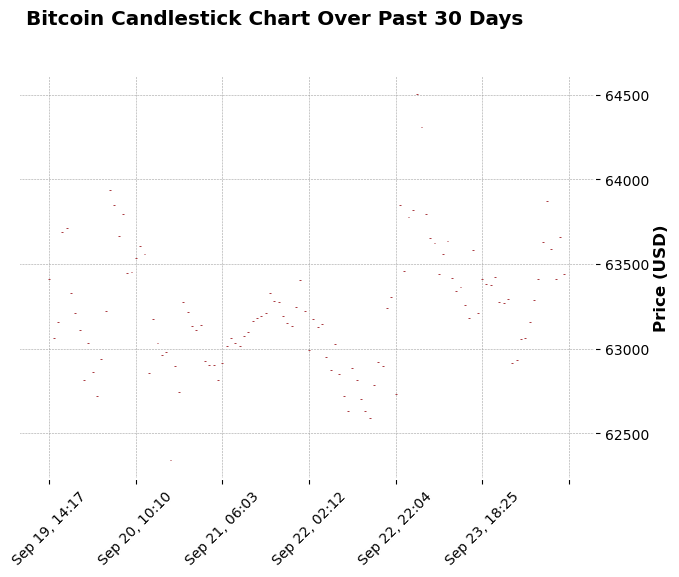

In [26]:
# modify the above code to plot the candle stick using "MPLFINANCE"
# PREREQUESITES: PIP INSTALL MPLFINANCE
# mpl finance module used to create the candlestick chart using matplotlib. It provides a very convenient API to handle Financial charts.
# OHLC Data Preparation: We prepare the OHLC(Open,High,Low,Close) data needed for plotting a candlestick chart by aggregating the Price data.
# Candlestick chart: we use mpf.plot() form the mpl finance package to create the candlestick plot , specifying


"""PyCoinGecko for CoinGecko API"""
"""we will use the pie coin gecko python client or wapper for the coin gecko api 
   we are going to learn pandas time series functions for dealing with time series data
   steps to follow
   pip install pycoingecko and then import the library"""
import pandas as pd
from pycoingecko import CoinGeckoAPI
from datetime import datetime, timedelta
import mplfinance as mpf

# CLIENT OBJECT
cg = CoinGeckoAPI()

# Get current timestamp and timestamp from 5 days ago
to_timestamp = int(datetime.now().timestamp())  # current time in Unix timestamp
from_timestamp = int((datetime.now() - timedelta(days=5)).timestamp())  # 5 days ago in Unix timestamp

#FUNCTION TO REQUEST OUR DATA
bitcoin_data = cg.get_coin_market_chart_range_by_id(id ='bitcoin', vs_currency='usd', from_timestamp=from_timestamp, to_timestamp=to_timestamp )
# print(bitcoin_data)

# Extracting the "price" field(which is a list of lists: [[timestamp, price], ...])
prices = bitcoin_data['prices']

# Create data frame with 'Timestamp' and 'Price' columns 
data = pd.DataFrame(prices, columns =['Date','Price'])
# print(data)

# Converting Unix TimeStamp to readable data format
data['Date']=pd.to_datetime(data['Date'],  unit='ms')

# Add columns for 'Open', 'High', 'Low', 'Close' prices (for simplicity, use random or sample data)
# Here, we can assume 'Price' is the 'Close' price for simplicity in this example
data['Open'] = data['Price']  # You can replace this with actual data for more realistic charts
data['High'] = data['Price']  # You can replace this with actual data for more realistic charts
data['Low'] = data['Price']  # You can replace this with actual data for more realistic charts
data['Close'] = data['Price']  # Already have this from the API response

# Creating the OHLC (Open, High, Low, Close) DataFrame
ohlc_data = data[['Date', 'Open', 'High', 'Low', 'Close']]

# Set 'Date' column as index and ensure it's of type DatetimeIndex
ohlc_data.set_index('Date', inplace=True)
ohlc_data.index = pd.to_datetime(ohlc_data.index)

# Plot the candlestick chart using mplfinance
mpf.plot(ohlc_data, type='candle', style='charles', title='Bitcoin Candlestick Chart Over Past 30 Days', ylabel='Price (USD)', volume=False)


# https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data


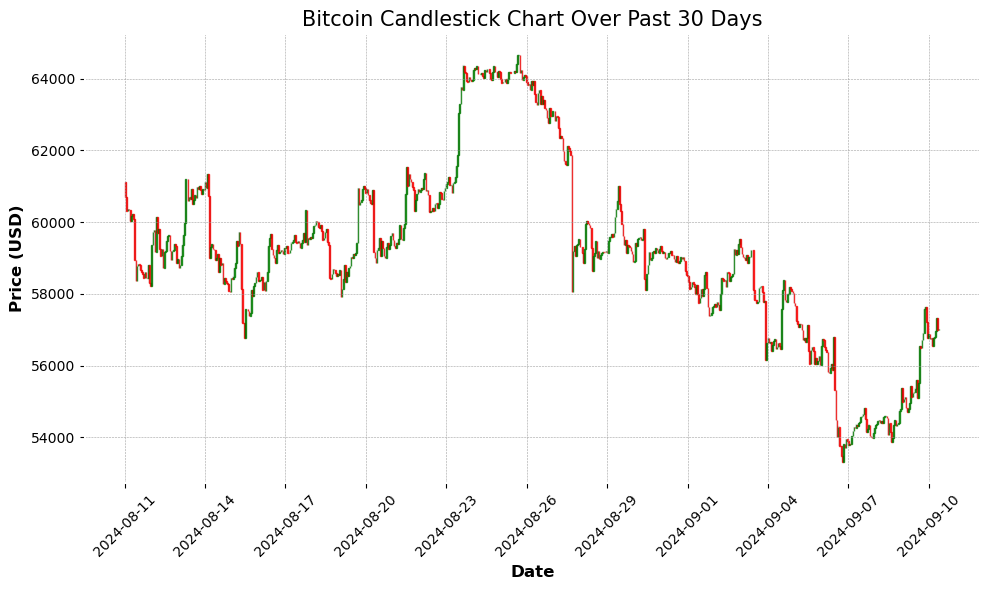

In [4]:
# If you want to plot a candlestick chart using just matplotlib.pyplot without using mplfinance, you'll need to manually construct the candlestick plot. Below is the modified code using only matplotlib:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from datetime import datetime, timedelta

# CLIENT OBJECT
cg = CoinGeckoAPI()

# Get current timestamp and timestamp from 30 days ago
to_timestamp = int(datetime.now().timestamp())  # current time in Unix timestamp
from_timestamp = int((datetime.now() - timedelta(days=30)).timestamp())  # 30 days ago in Unix timestamp

# FUNCTION TO REQUEST OUR DATA
bitcoin_data = cg.get_coin_market_chart_range_by_id(id='bitcoin', vs_currency='usd', from_timestamp=from_timestamp, to_timestamp=to_timestamp)

# Extracting the "prices" field (which is a list of lists: [[timestamp, price], ...])
prices = bitcoin_data['prices']

# Create data frame with 'Timestamp' and 'Price' columns
data = pd.DataFrame(prices, columns=['Date', 'Price'])

# Converting Unix Timestamp to readable data format
data['Date'] = pd.to_datetime(data['Date'], unit='ms')

# Create Open, High, Low, Close values by using some logic (for simplicity, random small variations)
# You should replace this with actual OHLC data if available
data['Open'] = data['Price'].shift(1)  # Open is the previous close
data['Close'] = data['Price']
data['High'] = data[['Open', 'Close']].max(axis=1) + np.random.uniform(0.5, 1.0, len(data))  # Adding random to simulate
data['Low'] = data[['Open', 'Close']].min(axis=1) - np.random.uniform(0.5, 1.0, len(data))  # Subtracting random

# Remove rows with missing Open values created due to the shift
data = data.dropna()

# Plot the candlestick chart using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of candlestick body and line (wick) width
width = 0.6
width2 = 0.1

# Loop through each row of the data and plot the candles
for idx, row in data.iterrows():
    color = 'green' if row['Close'] >= row['Open'] else 'red'
    # Plot candle body (rectangle)
    ax.add_patch(plt.Rectangle((idx - width/2, row['Open']), width, row['Close'] - row['Open'], color=color, alpha=0.8))
    
    # Plot the wicks (high-low line)
    ax.plot([idx, idx], [row['Low'], row['High']], color='black', linewidth=width2)

# Formatting the plot
ax.set_title('Bitcoin Candlestick Chart Over Past 30 Days', fontsize=15)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (USD)', fontsize=12)
ax.set_xticks(np.arange(0, len(data), step=len(data)//10))
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in data['Date'].iloc[::len(data)//10]], rotation=45)
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Explanation:
# OHLC Data Generation:

# Since you're only provided with Price data from the API, we simulate Open, High, and Low values using shift and random fluctuations. If you have real OHLC data, replace this part.
# Candlestick Plot:

# The candlestick's body is drawn using plt.Rectangle, where the width is a constant and the height depends on the difference between Open and Close.
# The high-low wicks are drawn using ax.plot() for each row of the DataFrame.
# Plot Formatting:

# The x-axis represents time, and the y-axis represents price. The candlestick body is colored green if the closing price is higher than the opening price, otherwise, it’s red.
# Tight Layout:

# plt.tight_layout() ensures that labels don't overlap or go off the figure.

In [5]:
"""NOTE: WEBSCRAPING 
OBJECTIVES:
*define webscraping
*beautiful soup objects
*find_all
*webscrape a website

USING PYTHON TO WEBSCRAPING USING TWO MODULES "REQUEST" AND "BEAUTIFUL SOUP" """

from bs4 import BeautifulSoup
html = " <!DOCTYPE html> <html><head><title>USA_Basketball_men's_salaries</title></head><body><h3><b id ='boldest'>Lebron James</b></h3><p>Salary: $92,000,000</p><h3>Stephen Curry</h3><p>Salary: $85,000,000</p><h3>Kevin Durant</h3><p>Salary: $73,200,000</p></body></html> "

# soup constructor
soup= BeautifulSoup(html, 'html5lib')

#Beautiful soup objects (Tag objects)
tag_object = soup.title
print(tag_object)

# first element will be select with the same tag name
tag_object = soup.h3
print(tag_object)

# navigate to child object in html tree to extract child of that object  boldest ,lebron james
tag_child = tag_object.b
print(tag_child)

# you can use parent attribute to navigate up the tree
parent_tag = tag_child.parent
print(parent_tag)

# to find the sibling of the next object using tag object
sibling_1 = tag_object.next_sibling
print(sibling_1)

# sibling of the sibling_1

sibling_2 = sibling_1.next_sibling
print(sibling_2)

sibling_3 = sibling_2.next_sibling
print(sibling_3)

# child object you can access the child object in key values as a dictionary
print(tag_child.attrs)

# return the content as a navigable string this is like python string that supports beautiful soup functionality 
print(tag_child.string)




<title>USA_Basketball_men's_salaries</title>
<h3><b id="boldest">Lebron James</b></h3>
<b id="boldest">Lebron James</b>
<h3><b id="boldest">Lebron James</b></h3>
<p>Salary: $92,000,000</p>
<h3>Stephen Curry</h3>
<p>Salary: $85,000,000</p>
{'id': 'boldest'}
Lebron James


In [ ]:
# METHOD FIND_ALL : This a filter you can use filter based on a tag's name its attributes the text of a string or some combinations
from bs4 import BeautifulSoup
html = "<table><tr><td>Pizza Place</td><td>Orders</td><td>Slices</td></tr><tr><td>Domino Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caeser</td><td>12</td><td>144</td></tr><tr><td>Papa John's</td><td>15</td><td>166</td></tr></table> "

table = BeautifulSoup(html, 'html5lib')

# it will fetch all the decendencs whos match your filters
# the result is python itterables just like a list
table_row = table.find_all(name = 'tr')
print(table_row)

# first row of the table
first_row = table_row[0]
print(first_row)

# first table cell
print(first_row.td)

# itterate through each table cells
# each elements(cells) corresponds to each row

for i,row in enumerate(table_row):
    print("row", i)
    cells = row.find_all("td")
    
    for j, cell in enumerate(cells):
        print("column", j , "cell", cell)




In [21]:
"""Note:how to apply a beautifulsoup to a WEBPAGE (scrape a webpage)"""

import requests
from bs4 import BeautifulSoup

page = requests.get("https://EnterWebsiteURL...").text

# Creates a BeautifulSoup object
soup = BeautifulSoup(page, "html.parser")

# Pulls all instances of <a> tag
artists = soup.find_all('a')

# Clears data of all tags
for artist in artists:
    names = artist.contents[0]
    fullLink = artist.get('href')
    print(names)
    print(fullLink)



In [ ]:
"""NOTE: WORKING WITH DIFFERENT FILE FORMATS

File formats: csv,xml and json
write simple programs to read and output data 
list what python libraries are needed to extract data

Python Library used to access these file data:
PANDAS LIBRARY for CSV file formate:
   import pandas as pd
   file = "FileExample.csv"
   df = pd.read_csv(file)

# how to correct this issuse: if the first line of the data as a header
# using data frame attribute columns
   
   df.columns = ['Name', 'Phone Number' , 'Birthday']
   
JSON FILE FORMATE : PYTHON LIBRARY  
# In this formate the text is written in language independent formate similar to python dictionary
# to open the file we can use load attribute of json

   import json
   with open('filesample.json','r') as openfile:
     json_object = json.load(openfile)
   print(json_object)
   
XML FILE FORMATE:  
# pandas library doesn't have the attribute to read this type of file
# etree library we use to parse the xml file

   import pandas as pd
   import xml.etree.ElementTree as etree
   tree = etree.parse("fileExample.xml")
   root = tree.getroot()
   columns = ["Name", "Phone Number", "Birthday"]
   df = pd.DataFrame(columns = columns)
   
   for node in root:
      name = node.find("name").text
      phonenumber = node.find("phonenumber").text
      birthday = node.find("birthday").text
   
   df = df.append(pd.Series([name, phonenumber, birthday], index = columns)
   ignore_index = True)
   
   print(df)
"""


In [1]:
"""DATA ANALYSIS"""
# Data is everywher
# Data analysis/data science helps us answer questions from data.
"""DATA ANALYSIS PLAYS AN IMPORTANT ROLE IN:"""
# Discovering useful information
# Anawering questions
# Predicting future or the unkown

# NOTE PROBLEM 1
"""ESTIMATE USED CAR PRICES USING DATA"""
# How can we help Tom determine the best price for his car?
# Is there data on the prices of other cars and their characteristics?
# What features of cars affect their prices? color? brand? horsepower? something else?
# Asking the right questions in terms of data

# we need some data on used car prices
#  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

"""PYTHON PACKAGES FOR DATA SCIENCE

we divided libraries into three groups

1.Scientifics Computing Libraries in Python:
    *Pandas: Data structures&tool
    *NumPy: Array & Matrices
    *SciPy: Integrals, solving differential equations, optimization

2. Visulization Libraries:
    *Matplotlib: plots&graphs, most popular
    *Seaborn: plots:heatmaps, time series, violin plots
    
3.Algorithmic Libraries:
    *Sciki-Learn: Machine Learning: regression, classification
    *Statsmodel: Explore data, estimate statistical models, and perform statistical tests.
    
"""

"""
NOTE:IMPORTING AND EXPORTING DATA IN PYTHON
"""
# Process of loading and reading data into Python from various resources.
# Two important properties(using pandas package): 
# Format : the way data is encoded (.csv, .json , .xlsx, .hdf...)
# File path: local(computer) or website(https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)

import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url)
print(df)

# our data contains no header read_csv needs header so we need execute no header here

df1 = pd.read_csv(url, header = None)
print(df1)

# to see the first n rows of the data frame
print(df1.head(5))

# to show the bottom n rows of data frame
print(df1.tail(5))

# assign headers in pandas
headers =["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

# printing n columns of the data frame using 'iloc[]' using this method you can select rows and columns
df1.columns = headers
r=5
c=5
print(df1.iloc[:r,:c])

# #Exporting a Pandas dataframe to new CSV file(preserve progress anytime by saving modified dataset using)

# # path = "/Users/john_logan/code/AIandDataScience_learnings/automobile.csv"

# path = "/Users/john_logan/code/AIandDataScience_learnings/automobile.xlsx"

# # df1.to_csv(path)
# df1.to_excel(path)
# # df1.to_sql(path)
# # df1.to_json(path)

# """different data format to read and save
# pd.read_csv() df.to_csv()
# pd.read_json() df.to_json()
# pd.read_excel() df.to_excel()
# pd.read_sql() df.to_sql()
# """


     3    ?  alfa-romero     gas    std   two  convertible  rwd  front  88.60  \
0    3    ?  alfa-romero     gas    std   two  convertible  rwd  front   88.6   
1    1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   94.5   
2    2  164         audi     gas    std  four        sedan  fwd  front   99.8   
3    2  164         audi     gas    std  four        sedan  4wd  front   99.4   
4    2    ?         audi     gas    std   two        sedan  fwd  front   99.8   
..  ..  ...          ...     ...    ...   ...          ...  ...    ...    ...   
199 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
200 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   
201 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
202 -1   95        volvo  diesel  turbo  four        sedan  rwd  front  109.1   
203 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   

     ...  130  mpfi  3.47  

In [5]:
"""GETTING STARTED ANALYZING DATA IN PYTHON"""

# BASIC INSIGHTS FROM THE DATA

# Understand your data before you begin any analysis
# should check: Data Types, Data Distribution, 
# Locate potential issues with the data

""" BASIC INSIGHTS OF DATASET - DATA TYPES 

PANDAS TYPE : object, int64, float64, datetime64, timedelta(ns)
NATIVE PYTHON TYPE: string, int, float, N/A(but see the datetime module in Python's standard library)
"""
# Why check data types?
# potential info and type mismatch
# compatibility with python methods

# data types to check
df.dtypes

# to check the mathematical issuse that exist in the data (extrem outliers and large deviations)
# to get the quick statistics we use describe method.
# describe method skips rows and columns that do not contain numbers
# it is possible to make the describe method work for object type columns as well

print(df1.describe())

#to get provides full summary statistics(to enable the summary of all the columns)
# using all in describe method different set of statistics is evaluated like unique,top and frequency
# unique = no of distinct objects in the column
# top = most frequently occurring object
# freak = no of times the top object appears in the column
print(df1.describe(include="all"))


# dataframe.info() provides a concise summary of your DataFrame.
# this shows top 30 rows and bottom 30 of the data frame
print(df1.info())


        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

In [ ]:
"""NOTE:ACCESSING DATABASES WITH PYTHON"""

# There is a mechanism by which the python program communicates with dbms(using API calls)
# basic of sql apis and python db apis

# what is a SQL API?
# as an application programming interface api for the dbms calls functions to retrieve query results
# CONNECT(db, user,pswd)
# SEND("update employees set..")
# EXECUTE()
# STATUS_CHECK()
# OK
# DISCONNECT()

# PYTHON STANDARD API FOR ACCESSING RELATIONAL DATABASES
# The two main concepts in the python db api are connection objects and cursor/query objects

# CONNECTION OBJECTS: Database connections, Manage transactions
# methods used with connection objects
# cursor() : returns a new cursor object using the connection
# commit(): commit method is used to commit any pending transaction to db
# rollback(): roll back to the start of any pending transaction
# close() : used to close a db connections

# CURSOR OBJECTS: Database queries

""" PYTHON APPLICATION THAT USES THE DB API TO QUERY A DATABASE"""

from dbmodule import connect

# Create connection object
connection = connect('databasename','username','pswd')

# Create a cursor object
cursor = connection.cursor()

# Run queries
cursor.execute('select * from mytable')
results = cursor.fetchall()

# Free resources
cursor.close()
connection.close()


In [ ]:
""" PRE-PROCESSING DATA IN PYTHON """

# Identify and handle missing values
# Data Formatting
# Data Normalization(techniques like : centering /scaling)
# Data Binning: 
# Turning Categorical values to numeric variables

# to access the columns using data frame
print(df1["symboling"])

# to add 
print(df1["symboling"]+1)

""" DEALING WITH MISSING VALUES IN PYTHON """

""" DROPPING THE MISSING VALUES """

# check with the data collection source

# Drop the missing values : drop the variable  AND drop the data entry

#in python how we drop or repalce missing values in python pandas dropna()

# axis=0 drops the entire row
# axis=1 drops the entire column

# to modify the dataframe you need to set the parameter inplace equla to true
df1.dropna(subset =["price"], axis =0, inplace = True)

# Don't forget this line of code don't change the dataframe it will make sure your are performing the correct operations
df2 = df1.dropna(subset=["price"], axis =0)

# always check with pandas doc for further clarifications
# https://pandas.pydata.org/docs/

""" REPLACE MISSING VALUES IN PYTHON """
# Replace the missing values : replace it with an average(of similar datapoints)
# Replace it by frequency
# Replace it based on other functions
# in some source you leave it as missing data

# USE dataframe.replace(missing_value, new_value):

# calculate the mean of the columns so we can use the average values to replace the column
print(df1.head())
print(df1["normalized-losses"])
mean = df1["normalized-losses"].mean()
print(mean)
df1["normalized-losses"].replace(np.nan, mean)


In [63]:
""" MEAN calculation and replace the NAN with mean values """

# The error you're encountering (TypeError: Could not convert ???164164?158?... to numeric) suggests that the column normalized-losses contains values that are not properly formatted as numeric. This is preventing the calculation of the mean.
# Replace invalid string such as '???' with NaN
# convert the column to numeric: pd.to_numeric()
# compute the mean
# Replace NaN with the Mean

import numpy as np

# Replace non_numeric values like '???' with NaN
df1["normalized-losses"].replace("???",np.nan, inplace=True)

# Convert the column to numeric (will convert any remaining invalid strings to NaN)
df1["normalized-losses"] = pd.to_numeric(df1["normalized-losses"],errors='coerce')

# # specific columns and n rows
# print(df1["normalized-losses"].head(5))
# print(df1[:5]["normalized-losses"])
# for multiple columns
# print(df1[:5]["normalized-losses","column2","column3"])

# Calculate the mean of the column, skipping NaN values
mean = df1["normalized-losses"].mean()

# Replace NaN values in the column with the mean
df1["normalized-losses"].fillna(mean, inplace=True)

#check the result
print(df1["normalized-losses"].head())

# n =5
# col_index = df1.columns.get_loc("normalized-losses")
# print(df1.iloc[:n,col_index])


0    122.0
1    122.0
2    122.0
3    164.0
4    164.0
Name: normalized-losses, dtype: float64


In [6]:
"""
NOTE: DATA FORMATTING IN PYTHON 
Data with different formates,units and conventions and the pandas methods to deal with this issuses
"""
# Data are usually collected from different places and stored in different formats.
# Bringing data into a common standard of expression allows users to make meaningful comparison.

"""Applying calculations to an entire column"""
print(df1.columns)
# in case of the missing values present in the df
df1["city-mpg"].fillna(df1["city-mpg"].mean(), inplace=True)

# convert "mpg" to "L/100km" in car dataset.
df1["city-mpg"]=235/df1["city-mpg"]

# column renamed to city mileage per litter km
df1.rename(columns={"city-mpg": "city-L/100km"}, inplace=True)

print(df1["city-L/100km"].head())




Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
0    11.190476
1    11.190476
2    12.368421
3     9.791667
4    13.055556
Name: city-L/100km, dtype: float64


In [4]:
""" INCORRECT DATA TYPES """

# Sometimes the wrong data type is assigned to a feature.
# example:
print(df1["price"].tail(5))

# : data type is object not integer

""" Convert data type to integer in column 'price' using astype """

# first you need to identify any non-numeric values in the price column
print(df1["price"].unique())

# Convert non-numeric values to NaN: you can use pd.to_numeric() to convert any invalid entries to NaN before converting to integers.
df1["price"] = pd.to_numeric(df1["price"], errors = "coerce")


# Fill with a default value: Replace NaN with a specific value
df1["price"].fillna(df1["price"].mean(), inplace = True)
print(df1["price"].unique())
# or
# drop rows with missing values: Remove rows where NaN appears.
# df1.dropna(subset=["price"], inplace =True)
# print(df1["price"].unique())

df1["price"] = df1["price"].astype("int")

print(df1["price"].dtypes)

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object
['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' '?'
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558' '8921'
 '12964' '6479' '6855' '5399' '6529' '7129' '7295' '7895' '9095' '8845'
 '10295' '12945' '10345' '6785' '11048' '32250' '35550' '36000' '5195'
 '6095' '6795' '6695' '7395' '10945' '11845' '13645' '15645' '8495'
 '10595' '10245' '10795' '11245' '18280' '18344' '25552' '28248' '28176'
 '31600' '34184' '35056' '40960' '45400' '16503' '5389' '6189' '6669'
 '7689' '9959' '8499' '12629' '14869' '14489' '6989' '8189' '9279' '5499'
 '7099' '6649' '6849' '7349' '7299' '7799' '7499' '7999' '8249' '8949'
 '9549' '13499' '14399' '17199' '19699' '18399' '11900' '13200' '12440'
 '13860' '15580' '16900' '16695' '17075' '16630' '17950' '18150' '12764'
 '22018' '32528' '34028' '37028' '9295' '9895' '1185

In [7]:
""" DATA NORMALIZATION IN PYTHON """
# Uniform the features value with different range.
# normalization of the range of the values consistant between variables : normalization allow fair comparision, and also important for computational reason.
# income: 100000 and age : 20 The nature of the data basis the linear regression model to weigh income more heavily than age.
# to avoid this we can normalize these two variables into the values that range zero to one income : 0.2 and age : 0.2

""" METHODS OF NORMALIZING DATA """

# 3Technique

""" Simple Feature Scaling """
# just divides each value by the maximum value for that feature
# x(new) = x(old)/x(max)
# this makes new values range between 0 to 1

""" Min - Max """
# takes each value old subtract it from the minimum value of that feature and divides by the range of that feature
# x(new) = x(old) - x(min)/x(max) -x(min)
# new value range between 0 to 1

"""Z-score or Standard Score """
# in this formula for each value you subtract the mu: which is the average of the feature and then divided by the standard deviation sigma
# x(new) = x(old - mu)/sigma
# new value hover around zero and typically range between negative three and positive three but can be higher or lower  


""" Applying Normalization on lenght of our data """

# simple feature scaling method
print(df1["length"].unique())
df1["length"] = df1["length"]/df1["length"].max()
print(df1["length"])

# # min-max method on length feature
df1["length"] = (df1["length"] - df1["length"].min()) / (df1["length"].max() - df1["length"].min())
print(df1["length"])

# Z-score in python
df1["length"] = (df1["length"] - df1["length"].mean()) / df1["length"].std()
print(df1["length"])


[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]
0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 205, dtype: float64
0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 205, dtype: float64
0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
         ...   
200    1.1

[13495 16500 13950 17450 15250 17710 18920 23875 13207 16430 16925 20970
 21105 24565 30760 41315 36880  5151  6295  6575  5572  6377  7957  6229
  6692  7609  8558  8921 12964  6479  6855  5399  6529  7129  7295  7895
  9095  8845 10295 12945 10345  6785 11048 32250 35550 36000  5195  6095
  6795  6695  7395 10945 11845 13645 15645  8495 10595 10245 10795 11245
 18280 18344 25552 28248 28176 31600 34184 35056 40960 45400 16503  5389
  6189  6669  7689  9959  8499 12629 14869 14489  6989  8189  9279  5499
  7099  6649  6849  7349  7299  7799  7499  7999  8249  8949  9549 13499
 14399 17199 19699 18399 11900 13200 12440 13860 15580 16900 16695 17075
 16630 17950 18150 12764 22018 32528 34028 37028  9295  9895 11850 12170
 15040 15510 18620  5118  7053  7603  7126  7775  9960  9233 11259  7463
 10198  8013 11694  5348  6338  6488  6918  7898  8778  6938  7198  7788
  7738  8358  9258  8058  8238  9298  9538  8449  9639  9989 11199 11549
 17669  8948 10698  9988 10898 11248 16558 15998 15

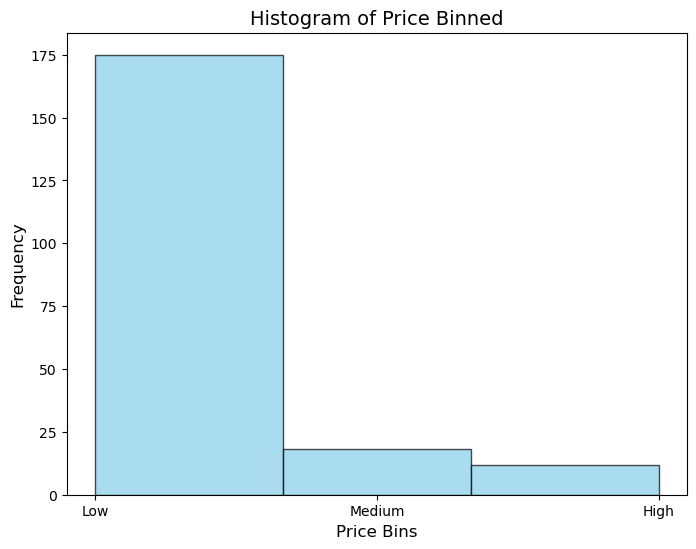

In [5]:
""" BINNING IN PYTHON (A method of data pre-processing)"""

# Binning: Grouping of values into "bins"
# Converts numeric into categorical varaibles
# Group a set of numerical values into a set of "bins"
# "price" is a feature range from 5k to 4.5k (in order to have a better representation of price) 
# we can bins them low, mid, high

""" Implementing binning with price column """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

print(df1["price"].unique())
# we use linspace to return the array bins contains four equally spaced numbers over the specified interval of the price
bins = np.linspace(min(df1["price"]),max(df1["price"]),4)

# list of different bin names
group_names =["Low","Medium","High"]

# we use panda's functions cut to short and segment the data values in to bins
df1["price-binned"]= pd.cut(df1["price"],bins,labels=group_names,include_lowest=True)

print(df1.columns)
#you can use "HISTOGRAMS" to visualize the data after they divided into bins

# set the figure size
plt.figure(figsize =(8, 6)) 

# Plot the histogram for the 'price-binned' column
plt.hist(df1["price-binned"], bins =3, color = "skyblue", edgecolor="black", alpha=0.7)

# add labels and title

plt.xlabel("Price Bins", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Price Binned", fontsize=14)

plt.show()

# ERROR NOTED: UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' '?'
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558' '8921'
 '12964' '6479' '6855' '5399' '6529' '7129' '7295' '7895' '9095' '8845'
 '10295' '12945' '10345' '6785' '11048' '32250' '35550' '36000' '5195'
 '6095' '6795' '6695' '7395' '10945' '11845' '13645' '15645' '8495'
 '10595' '10245' '10795' '11245' '18280' '18344' '25552' '28248' '28176'
 '31600' '34184' '35056' '40960' '45400' '16503' '5389' '6189' '6669'
 '7689' '9959' '8499' '12629' '14869' '14489' '6989' '8189' '9279' '5499'
 '7099' '6649' '6849' '7349' '7299' '7799' '7499' '7999' '8249' '8949'
 '9549' '13499' '14399' '17199' '19699' '18399' '11900' '13200' '12440'
 '13860' '15580' '16900' '16695' '17075' '16630' '17950' '18150' '12764'
 '22018' '32528' '34028' '37028' '9295' '9895' '11850' '12170' '15040'
 '15510' '18620' '5118' '7053' '7603' '7126' '7775' '9960' '9233' '11259'

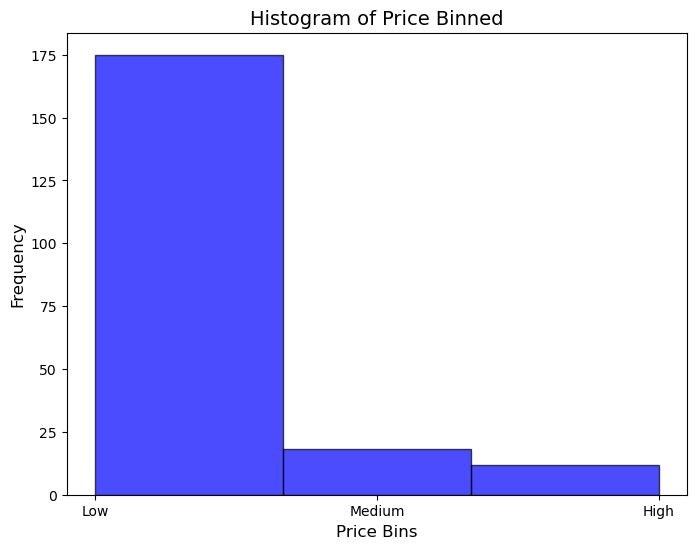

In [12]:
""" UFuncTypeError: ufuc 'multiply' did not contain a loop with signature matching types: 
                    Typically arises when an operation is attempted on incomplatible data types 
                    the price column are being interpreted as strings dtype but numeric operations are being applied which requres that column values to be of a 
                    numeric type"""
             
""" Implementing binning with price column """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

print(df1["price"].unique())

# Convert non-numeric values to NaN: you can use pd.to_numeric() to convert any invalid entries to NaN before converting to integers.
df1["price"] = pd.to_numeric(df1["price"], errors = "coerce")

# fill NaN values with the mean price
df1["price"].fillna(df1["price"].mean(), inplace = True)

# we use linspace to return the array bins contains four equally spaced numbers over the specified interval of the price
bins = np.linspace(min(df1["price"]),max(df1["price"]),4)
print(bins)

# list of different bin names
group_names =["Low","Medium","High"]

# we use panda's functions cut to short and segment the data values in to bins
df1["price-binned"]= pd.cut(df1["price"],bins,labels=group_names,include_lowest=True)

print(df1.columns)
#you can use "HISTOGRAMS" to visualize the data after they divided into bins

# set the figure size
plt.figure(figsize =(8, 6)) 

# Plot the histogram for the 'price-binned' column
plt.hist(df1["price-binned"], bins =3, color = "blue", edgecolor="black", alpha=0.7)

# add labels and title

plt.xlabel("Price Bins", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Price Binned", fontsize=14)

plt.show()

In [59]:
""" TURNING CATEGORICAL VARIABLES INTO QUANTITATIVE VARIABLES IN PYTHON """

# Categorical Variables problem:
# Most statistical models cannot take in the objects/string as input
# example: in fuel type feature has two categorical variable gas or diesel which are in string formate 
#          for futher analysis we need to convert these variables to numerical formate
# Solution:
# Add dummy variables for each unique category assign 0 or 1 in each category

""" This technique is called: one-hot encoding """

print(df1["fuel-type"].unique())

# dummy variable method in python pandas
# use pandas.get_dummies() method.
# convert categorical variables to dummy variables (0 or 1)

import pandas as pd

dummies =pd.get_dummies(df1["fuel-type"])

print(dummies)


[nan]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[205 rows x 0 columns]


In [56]:
""" EDA (EXPLORATORY DATA ANALYSIS) using python """

# Preliminary step in data analysis to:
# Summarize main characteristics of the data
# Gain better understanding of the data set
# Uncover relationships between variables
# Extract important variables

"""The main question we are going to answer here is: """
# "What are the characteristics which have the most impact on the car price?"

""" Learning Objectives """

# Descriptive Statistics : describes basic features of the data set and obtain short summary of the sample measures of the data
# GroupBy : basics of grouping data using GroupBy method
# Correlation : to transform our dataset we use correlation between our variables 
# Correlation - Statistics : advance correlation statistical methods example : pearson correlation, correlation heat maps


""" DESCRIPTIVE STATISTICS """
# Summarize statistics using pandas 'df.describe()' method
# provides basic statistics for all numerical variables
# it shows count, mean, standard diviation and the quartiles and the extreme values in the data set

# any NaN values are automatically skipped in this statistics
# this function will give you a clearer idea of the distribution of your different variables.
print(df1.describe())


# Summarize the categorical data is by using the 'value_counts() method:
# These are variables that can be divided up into different categories or groups and have discrete values

# example in feature 'drive-wheels'

drive_wheels_counts= df1["drive-wheels"].value_counts().to_frame()

print(drive_wheels_counts)

# we can change the name of the column easier to read
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace =True)

print(drive_wheels_counts)

        symboling  normalized-losses  make  fuel-type  aspiration  \
count  205.000000         164.000000   0.0        0.0         0.0   
mean     0.834146         122.000000   NaN        NaN         NaN   
std      1.245307          35.442168   NaN        NaN         NaN   
min     -2.000000          65.000000   NaN        NaN         NaN   
25%      0.000000          94.000000   NaN        NaN         NaN   
50%      1.000000         115.000000   NaN        NaN         NaN   
75%      2.000000         150.000000   NaN        NaN         NaN   
max      3.000000         256.000000   NaN        NaN         NaN   

       num-of-doors  body-style  drive-wheels  engine-location  wheel-base  \
count           0.0         0.0           0.0              0.0  205.000000   
mean            NaN         NaN           NaN              NaN   98.756585   
std             NaN         NaN           NaN              NaN    6.021776   
min             NaN         NaN           NaN              NaN   8

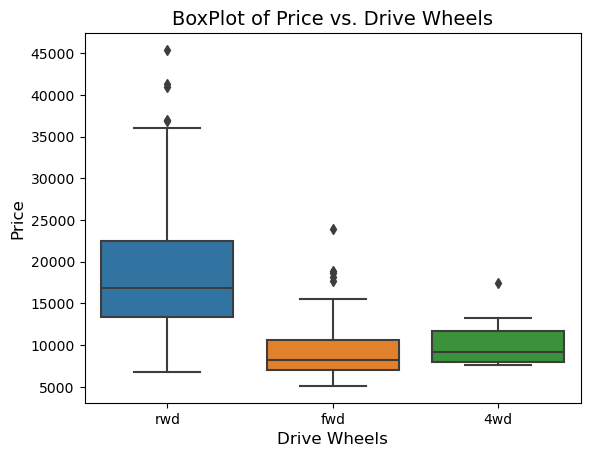

In [13]:
""" DEXCRIPTIVE STATISTIS - BOX PLOTS """
# Box Plots are greate way to visualize the numeric data
# Main features of the Box Plots shows
# upper extreme
# upper quartile(75%)
# Median
# lower quartile(25%)
# Whisker
# Lower extreme
# outlier/single data point

# the data between upper and lower quartile range represents inter quartile range 
# the upper extreme and lower extreme are calculate upto 1.5 times of inter quartile range
# finally Outlier are represented as individual dots outside the upper and lower extremes
# outlier are easy to identify in box plots and also see the distribution and skewness of the data
# box plot make it easy to compare between groups 

# exmaple for box plots different categories of the drive wheels feature over price feature
# seaborn is a python library used for making statistical graphics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.boxplot(x= "drive-wheels" , y="price",data=df1)

plt.xlabel("Drive Wheels", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("BoxPlot of Price vs. Drive Wheels", fontsize=14)

plt.show()

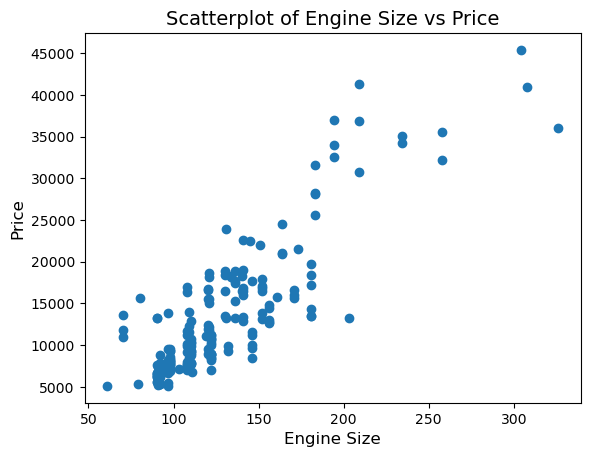

In [58]:
""" DESCRIPTIVE STATISTICS - SCATTER PLOT """
# Oftentimes we tend to see continous variable in our data and these data points are numbers contained in some range
# example : from our data set price and engine sixe are continuous variables 
# what if we want to understand the relationship between two variables: scatter plot show the relationship between two variables
# each observation represented as a point.
# 1. Predictor/independent variable on x-axis (predictor variable is 'engine size')
# 2. Target/dependent variables on y-axis ('price' is our traget variable)

import matplotlib.pyplot as plt

y= df1["price"]
x= df1["engine-size"]

plt.scatter(x,y)

plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Scatterplot of Engine Size vs Price", fontsize=14)
plt.show()

# observation: we see that as the engine size goes up the price of the car also goes up
#  this is giving us an initial indication that there is a positive linear relationship between these two variables 

['rwd' 'fwd' '4wd']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
groupby:   drive-wheels   body-style         price
0           4wd    hatchback  10405.064677
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9930.934363
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14278.269966
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222
pandas_pivot:body-style    convertible       hardtop     hatchback         sedan  \
drive-wheels                                                          
4wd                   NaN           NaN  10405.064677  12647.333333   
fwd               11595.0   8249.000000   8396.387755   9930.934363   
rwd               2

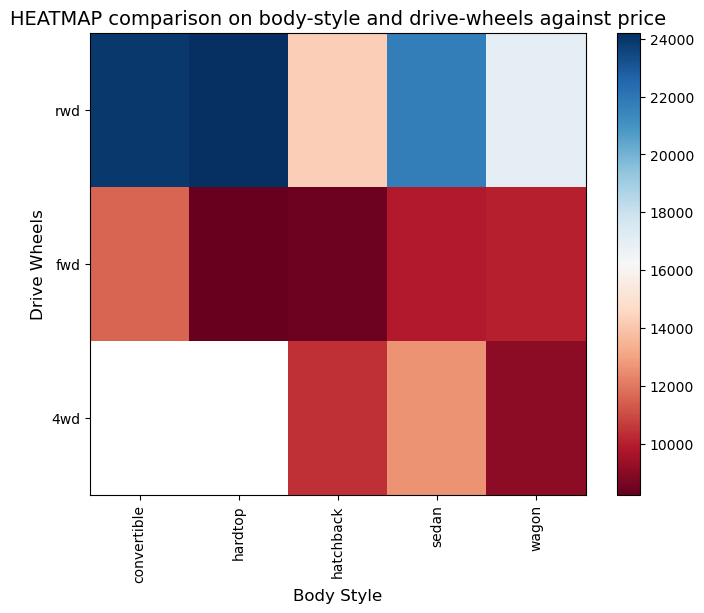

In [14]:
""" GroupBy in the Python """
# Grouping data: we want to know is there relationship between the different types of drive system
# which type of drive system adds the most value to a vehicle fwd rwd or 4wd
# if we group the data by the different types of drive wheels and compare the results of different drive wheels against each other

# Use Panda dataframe.Groupby() method: 
# can be applied on categorical variables
# groups the data into subsets accordig to the different categories of that variable : Group data into categories
# single or multiple variables

# GroupBy() - Example:
# let's say we are interested in finding the average price of vehicles and observe how they differ between different types of body styles and drive wheels variables

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


print(df1["drive-wheels"].unique())
print(df1["body-style"].unique())

# pick the three data columns we are interested to compare
df_test =df1 [['drive-wheels', 'body-style', 'price']]

# group the reduced data according to drive wheels and body style 
# since we are intereste in knowing how the average price differs across the board we can take the mean of each and appended this bit at the very end of the line 
# the data is now grouped into subcategories and only the average price of each subcategory is shown 
df_grp =df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
print(f"groupby:{df_grp}")

# observation: as we see that rwd convertible and hardtop have the highest value while 4wd hatchbacks have the lowest value
# this table is easy to read but not easy to visualize to make it easier to understand we can transform this table to a pivot table by using the 'PIVOT METHOD'

""" PANDAS PIVOT TABLE METHOD """
# One variable displayed along the columns and the other variable displayed along the rows.

df_pivot = df_grp.pivot_table(values ='price' ,index= 'drive-wheels', columns='body-style', aggfunc=np.mean)

print(f"pandas_pivot:{df_pivot}")

# the price data becomeas a rectangular grid which is easier to visualize 
# this is similar to what is usually done in excel spreadsheets


""" HEATMAP """
# another way of representing the pivot table is using a heat map
# heat map takes a rectangular grid of data and assings a color intensity based on the data value at the grid points its a great way to plot the target variable over
# multiple variables

# is this we use pi plots pcolor method to plot heat map
# convert previous pivot table into a graphical form 
# we specified redblue color scheme

# code:
# plt.pcolor(df_pivot, cmap ='RdBu')
# plt.colorbar()
# plt.title("HEATMAP comparison on body-style and drive-wheels against price", fontsize=14)
# plt.show()
""" NOTE: difficulties faces the heatmap plot not properly assigned x and y axis values"""

"""soulutions:"""
# when you use plt.pcolor() it plots the data but does not automatically label the axes. To ensure that body-style is on the x-axis and drive-wheels is on the y-axis,
# you need to explicitly se the tricks and labels on the axes.

# code:

# set figure size for clarity
plt.figure(figsize=(8,6))

# plot the heatmap using pcolor
plt.pcolor(df_pivot, cmap= 'RdBu')

# add color bar for reference
plt.colorbar()

# set x-axis ticks and labels (body-style)
plt.xticks(np.arange(0.5, len(df_pivot.columns), 1), df_pivot.columns, rotation=90)

# set y-axis ticks and labels (drive-style)
plt.yticks(np.arange(0.5, len(df_pivot.index), 1),df_pivot.index)
           
# add labels and title
plt.xlabel("Body Style", fontsize=12)
plt.ylabel("Drive Wheels", fontsize=12)
plt.title("HEATMAP comparison on body-style and drive-wheels against price", fontsize =14)
           
plt.show()

(0.0, 52458.62199183045)

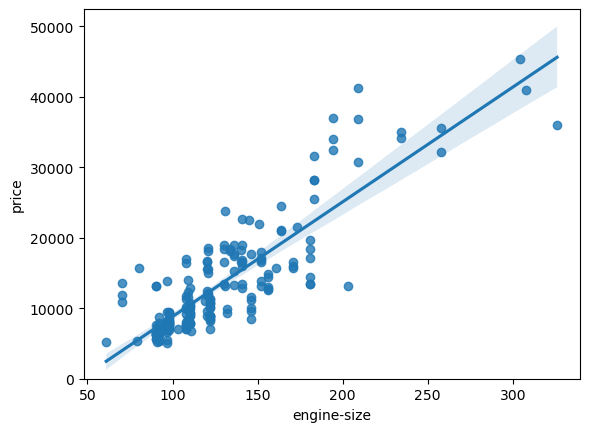

In [24]:
""" CORRELATION """

# Measures to what extent different variables are interdependent.
# Correlation doesn't imply causation.
# example: rain --> umbrella are correlated.
# causation: but we don't have enough information about umbrella caused the rain or the rained caused the umbrella.

""" Correlation - Positive Linear Relationship """
# Correlation between two features(engine-size and price).

# using a scatter plot and add a linear line: called regression line and it indicates the relationship between these two variables.

import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x ="engine-size", y="price", data=df1)
plt.ylim(0,)

# positive linear relationship between engine-size vs price



(0.0, 48135.46907797585)

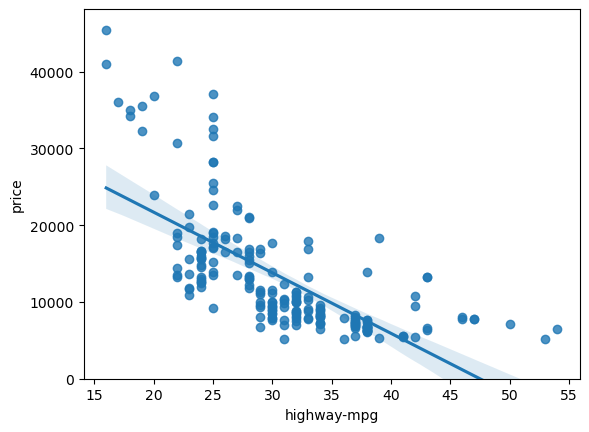

In [25]:
# Correlation between two features( highway-mpg and price)

sns.regplot(x="highway-mpg", y="price", data=df1)
plt.ylim(0,)

# negative liear relationship between highway-mpg vs price
# this two variables set to have negative correlation

symboling               int64
normalized-losses      object
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ratio     float64
horsepower             object
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
price-binned         category
dtype: object


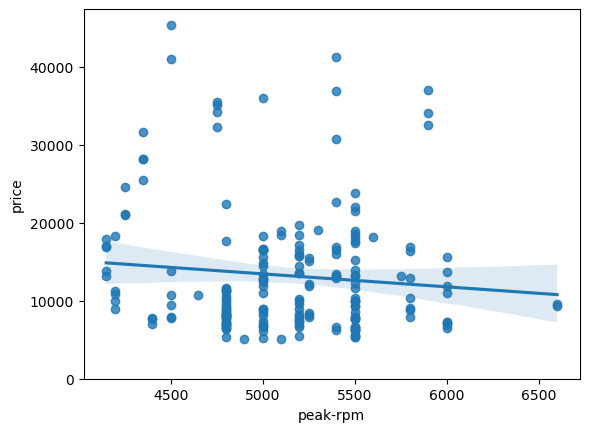

In [30]:
# Weak correlation between two features (peak-rpm and price)

# sns.regplot(x="peak-rpm", y="price", data=df1)
# plt.ylim(0,)

# error you're encountering is due to the fact that the multiply function in NumPy (Which is likely used internally by sns.regplot) doesn't know how to handle a combination
#  of string (dtype ('u4')) and (dtype('float64')). contains strings instead of numeric values.

print(df1.dtypes)
# convert the columns to numeric, if needed:

df1["peak-rpm"] = pd.to_numeric(df1["peak-rpm"], errors="coerce")

sns.regplot(x="peak-rpm", y="price", data=df1)
plt.ylim(0,)
plt.show()

# observation : peak-rmp has high and low price so this is a weak correlation


In [46]:
""" CORRELATION - STATISTICS METHODS """

""" PEARSON CORRELATION """
# Measure the strength of the correlation between two features.
# pearson correlation gives you two values:
# Correlation coefficient
# P-value

# interpretending the values:
""" Correlation Coefficient """
# Close to +1: Large Postive relationship
# Close to -1: Large Negative relationship
# Close to 0: No relationship

""" P-value """
# P-value tells us how certain we are about the values we are calculated.
# P-value < 0.001 STRONG certainty in the result
# P-value < 0.05 Moderate certainty in the result
# P-value < 0.1  weak certainty in the result
# P-value > 0.1  no certainty in the result

""" Strong Correlation : """
# Correlation coefficient close to 1 to -1
# P value less than 0.0001

# https://en.wikipedia.org/wiki/Correlation#/media/File:Correlation_examples2.svg

# the following above plot shows that data with different correlation values 

#EXAMPLE: lets check the correlation between variables  horse power and car price

# HOW EASILY WE CAN CALCULATE PEARSON CORRELATION USING 'SCIPY STATS PACKAGE'

from scipy import stats
import pandas as pd

df1["horsepower"] = pd.to_numeric(df1["horsepower"], errors="coerce")

# error :ValueError: array must not contain infs or NaNs
# drop rows with NaN values in horsepower or price columns
# df_clean =df1[["horsepower"]].dropna()
# pearson_coef, p_value = stats.pearsonr(df_clean["horsepower"], df1["price"])

# ValueError: x and y must have the same length.
df_clean =df1[["horsepower","price"]].dropna()

pearson_coef, p_value = stats.pearsonr(df_clean["horsepower"], df_clean["price"])


# Output the results
print(f"Pearson Correlation Coefficient: {pearson_coef}")
print(f"P-value: {p_value}")

# observation the correlation co-efficient is approximately 0.8 and this is close to 1 there is strong positive correlation
# and the P-value is much smaller than 0.001

# explanation for P-value
# P-value: In this case, the p-value is 2.849208167486763e-39, which can be written as 
# 2.85×10−39 This value is extremely close to zero.
# Threshold (α = 0.001): A common threshold for significance is 
# α=0.001. If the p-value is smaller than this threshold, the correlation is considered statistically significant.

# Why such a small p-value?
# The result of 2.85×10⁻³⁹ is expressed in scientific notation because it is a very small number, close to zero. 
# This happens in strong correlations or when the sample size is large enough to detect small variations with high precision.

Pearson Correlation Coefficient: 0.7587142204139694
P-value: 2.849208167486763e-39


In [ ]:
1. Pearson Correlation
Definition: Pearson correlation measures the strength and direction of a linear relationship between two continuous variables. It quantifies how much one variable changes when another variable changes.

Range: The Pearson correlation coefficient (denoted as r) ranges from -1 to +1:

+1 indicates a perfect positive linear correlation,
-1 indicates a perfect negative linear correlation,
0 indicates no linear correlation.
Assumptions:
Both variables should be continuous and approximately normally distributed.
The relationship between the variables should be linear

Usage: To use Pearson correlation:
Calculate the correlation coefficient using a function like pearsonr() from scipy.stats.
A high absolute value of r (close to 1 or -1) suggests a strong relationship, while a value close to 0 suggests a weak relationship.
Example: If you want to find the correlation between height and weight, you would calculate the Pearson correlation coefficient to see how changes in height are related to changes in weight.

2. Chi-Square Test for Association
Definition: The Chi-Square test is a statistical test used to determine if there is a significant association between two categorical variables. It assesses whether the distribution of sample categorical data matches an expected distribution.

Range: The Chi-Square statistic is a non-negative value (greater than or equal to 0) that indicates how much the observed frequencies deviate from the expected frequencies.

Assumptions:

Both variables should be categorical.
The samples should be independent.
The expected frequency for each category should be at least 5 in a 2x2 table or larger.
Usage: To use the Chi-Square test:

Create a contingency table that shows the frequency counts of the different categories for both variables.
Calculate the Chi-Square statistic and associated p-value using chi2_contingency() from scipy.stats.
A low p-value (typically < 0.05) indicates a significant association between the two categorical variables.
Example: If you want to determine if there is an association between gender (male/female) and preference for a type of car (SUV/Sedan), you would set up a contingency table and perform a Chi-Square test to see if gender influences car preference.

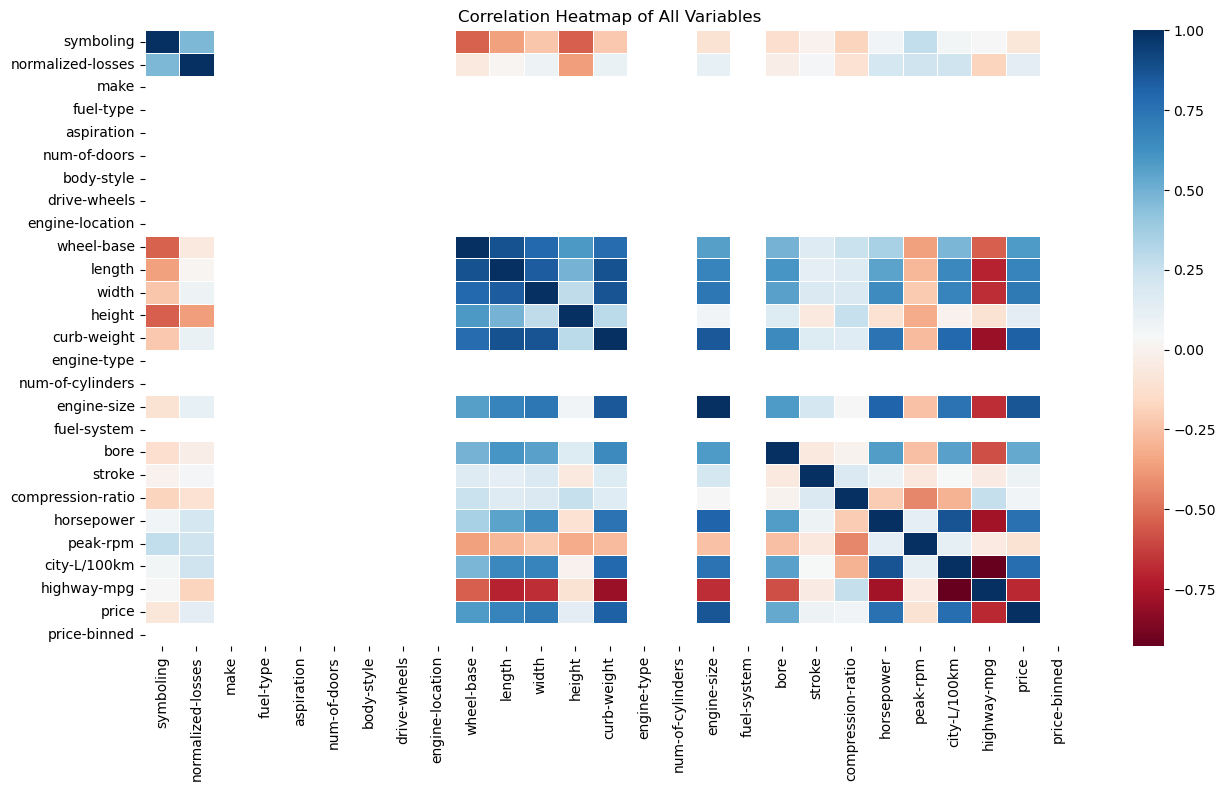

In [33]:

""" USING HEATMAP TO COMPARE THE PEARSON CORRELATION VALUES OF THE AN EACH VARIABLES WITH ONE ANOTHER """

# What is error =' coerce' in Pandas?
# errors : {'ignore', 'raise', 'coerce'}, default 'raise' If 'raise', then invalid parsing will raise an exception. If 'coerce',
# then invalid parsing will be set as NaN. If 'ignore', then invalid parsing will return the input.

# we can group by a column and pivot it if necessary, but usually for correlation, you'll work with numerical variables directly without grouping.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# replace '???' with NaN to all varaibles in the dataset
df1.replace('???', np.nan, inplace=True)

# ensure all variables are numeric
df1 = df1.apply(pd.to_numeric, errors='coerce')

# replace 'NaN' with the mean of each column
df1.fillna(df1.mean(), inplace=True)

# calculate the pearson correlation matrix
correlation_matrix = df1.corr(method= 'pearson')

# use seaborn heatmap to visualize the correlation matrix
# annot =True will show the values of correlation
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=False, cmap='RdBu',linewidths=0.5)

plt.title('Correlation Heatmap of All Variables')
plt.show()
        

In [ ]:
""" TO FIND OUT IF THERE IS A RELATIONSHIP BETWEEN TWO CATEGORICAL VARIABLES:

CHI-SQUARE: Test for Association

When dealing with the relationships between two categorical variables we can't use the same correlation method for continuous variables 

# We use the Chi-square Test for Association(denoted as x2)
# The test is intended to test how likely it is that an observed distribution is due to chance.

# Important points on chi-square test
>The chi-squre tests a null hypothesis that the variables are independent.
 the test compares: the observed data with the value that the model expect if the data is distributed in different categories by chance: any time the observed data doesn't fit with in the model
 of the expected values the probilities that the variables are dependent become stronger thus proving the null hypothesis is incorrect.
>The chi-squre does not tell you the type of relationship that exists between both variables; but only that a relationship exists.
"""

# EXAMPLE: lets find out is there an association between fuel-type and aspiration?(these are categorical variables)

# to find the relationship between two or more variables we use CROSS TAB LIBRARY in pandas
# cross tab also know as CONTINGENCY TABLE : counts of cars fuel type with aspirations

# formula for chi-square is given as follows
# summation of the observed value
# counts in each group minus the expected value all squared divided by the expected value
# expected values are based on the given totals 
# calculated the Expected values : Row total * Column total/Grand Total
# Degree of freedom = (row-1)* (column-1)
# search for "PERCENTAGE POINTS OF THE CHI-SQUARE DISTRIBUTION TABEL"
# x2=29.6
# P-value <0.05, we reject the null hypothesis that the two variables are independent and conclude that there is evidence of association between fuel-type and aspiration.


In [ ]:
""" insert image in jupyter notebook /change this to markdown """
![](chi_square_formula.jpg)



![](chi_square_formula.jpg)

In [ ]:
""" using html image tag / and resize the image /change this to markdown"""

<img src= "chi_square_formula.jpg" style="width:200px;height:400px"/>


<img src= "chi_square_formula.jpg" style="width:200px;height:400px"/>

![](Expected_value_calculation.jpg)

In [19]:
""" To apply the chi-square contigency function in scipy statistic package """

# Chi-Square test of independence on the df1 dataset between the fuel-type and aspiration variables.

# step1: Create a contigency table

# step2: use "scipy.stats.chi2_contigency() fuction to perfom the Chi-Square test.

import pandas as pd
from scipy import stats

# create a contigency table using pd.crosstab
cont_table = pd.crosstab(df1["fuel-type"],df1["aspiration"])

print(cont_table)

chi2,p,dof,expected = stats.chi2_contingency(cont_table, correction=True)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:")
print(expected)

# observation :

# chi-squared value:
# A high chi-squared value typically suggests that there is a larger difference between the observed and expected frequencies, 
# indicating that the two variables are more likely to be associated.

# P-value:
# the p-value is 5.29e-08 (essentially 0), which is far less than 0.05. This means we reject the null hypothesis, 
# concluding that the variables are significantly associated.

# Degrees of freedom (dof):
# the degrees of freedom are 1, suggesting a simpler contingency table with 2 categories (perhaps a 2x2 table).

# Expected Frequencies:
# The expected frequencies suggest a highly imbalanced distribution between the two variables.
# One category has expected values around 151.6 and 33.39, while the other has much lower expected values (16.39 and 3.61). 
# This imbalance could be contributing to the high chi-squared value.

# Summary:
    
# Significant association between the two variables.
# The small p-value (5.29e-08) strongly suggests rejecting the null hypothesis, meaning the variables are likely associated.
# The high chi-squared value and imbalance in expected frequencies indicate a strong difference between observed and expected values

aspiration  std  turbo
fuel-type             
diesel        7     13
gas         161     24
Chi-squared value: 29.605759385109046
P-value: 5.294738263678669e-08
Degrees of freedom: 1
Expected frequencies:
[[ 16.3902439   3.6097561]
 [151.6097561  33.3902439]]


In [2]:
""" Here's how you can use chi2_contigency in Python with a contingency table:"""

from scipy import stats
import numpy as np

cont_table = np.array([[10,20,30],
                       [6,9,17]])

# perform the chi-squared test of independence
chi2,p,dof,expected= stats.chi2_contingency(cont_table, correction=True)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: {expected}")

# observation :

# chi-squared value:
# A low chi-squared value (like 0.27 in the second output) suggests that the observed and expected frequencies are quite similar,
# meaning the variables are more likely to be independent.

# P-value:
# the p-value is 0.873, which is much greater than 0.05. This means we fail to reject the null hypothesis, indicating that the 
# variables are likely independent and there is no significant association.

# Degrees of freedom (dof):
# the degrees of freedom are 2, indicating a more complex table with more categories (perhaps a 2x3 table).

# Expected Frequencies:
# The expected frequencies are more evenly distributed across the table. For example, they range from 5.56 to 30.65, 
# which indicates more similarity between the observed and expected values, contributing to the low chi-squared value.

# Summary:
  
# No significant association between the two variables.
# The large p-value (0.873) suggests failing to reject the null hypothesis, meaning the variables are likely independent.
# The low chi-squared value and more balanced expected frequencies indicate that the observed values are close to what would 
# be expected under independence.

Chi-squared value: 0.27157465150403504
P-value: 0.873028283380073
Degrees of freedom: 2
Expected frequencies: [[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


In [ ]:
""" MODEL DEVELOPMENT """

# we will examine by model development trying to predic the price of an car using our dataset

# Learning Objectives:
# Simple and Multiple Linear Regression
# Model Evaluation using Visualization
# Polynomial Regression and Pipelines
# R-squared and MSE for in-Sample Evaluation
# Prediction and Decision Making

# Question:
# How can you determine a fair value for a used car?

# Model Development
# A model can be thought of as a mathematical equation used to predict a value given one or more other values.
# Relating one or more independent variables to dependent variables.

# example if you input a car model higtway-mpg as the independent variable or feature and the output of the model or dependent variables(price of the car)

![](car_price_predicting_model.jpg)

![](car_price_predicting_model2.jpg)

In [ ]:
""" LINEAR REGRESSION AND MULTIPLE LINEAR REGRESSION """

# Linear regression will refer to one independent variable to make a prediction
# Muliple Linear regression will refer to multiple independent variables to make a prediction.

![](linear_regression.jpg)


In [ ]:
# """ Simple Linear Regression """

# SLR is a method to understand the relationship between two variables
# The predictor(independent) variable -x
# The target (dependent) variable -y

# y=b0 + b1 * x

# b0 : the intercept
# b1 : the slope

# NOTE: WHEN WE FIT OR TRAIN THE MODEL WE COME UP WITH THESE PARAMETERS THIS STEP REQUIRES LOT OF MATHS 

The mathematical steps involved in finding the parameters b0(the intercept) and b1(the slope) for a linear regression model 

# y=b0+b1x

require optimization techniques, specifically minimizing the error between the predicted and actual values. 
The most common method used for this is Ordinary Least Squares (OLS) regression. 

# Heres the breakdown of the steps required:

1. Define the Objective Function (Loss Function):
    
The goal of linear regression is to find the values of b0 and b1 that minimize the error between the predicted values 
and the actual values y. In linear regression, we typically minimize the sum of squared residuals (errors).

For each data point i:
#    ^yi = b0 + b1 xi
    
^yi is the predicted value for data point 
xi is the feature (independent variable) value for data point 
yi is the actual target value for data point 

The residual (error) for each point is:

# Residual i =yi− y^i

To measure the total error, we sum the squares of the residuals for all data points:
#            n
# S(b0,b1) = ∑(yi−(b0+b1*xi))2
#            i=1
This is the function we want to minimize.

2. Take the Derivatives

To minimize the sum of squared residuals, we take the partial derivatives of the error function 
S(b0,b1) with respect to the parameters b0 and b1

Partial derivative with respect to b0(intercept):

∂S/∂b0 =−2i=1∑n(yi−(b0+b1xi))

Partial derivative with respect to b1(slope):

∂S/∂b0=−2 i=1∑n xi(yi−(b0+b1xi))


3. Solve the Normal Equations

To find the values of b0 and b1 that minimize the error, we set both partial derivatives to zero and solve the resulting 
system of normal equations.

Set ∂S/∂b0=0 and ∂S/∂b1=0.

This leads to the following system of equations:

# n              n
# ∑ yi =nb0 +nb1 ∑ xi
# i=1           i=1

# n          n         n
# ∑ xiyi =b0 ∑ xi + b1 ∑ x^2i
# i=1        i=1       i=1
 
These are called the normal equations.

4. Solve for b0 and b1

Using the normal equations, we can solve for the values of b0(intercept) and b1(slope):

Slope b1:
#        n        n      n        n          n
#   b1= n∑ xiyi - ∑  xi  ∑ yi / n ∑  x^2i - (∑  xi)^2
#        i=1      i=1    i=1      i=1        i=1

Intercept b0:
#             n            n 
#    b0 = 1/n ∑ yi -b1 1/n ∑ xi 
#             i=1          i=1

 
5. Interpret the Results

b1 represents the slope, or the change in y for a one-unit increase in x.

b0 represents the intercept, or the predicted value of y when x=0.

Summary of Steps:
Define the loss function: sum of squared residuals.
Take the partial derivatives of the loss function with respect to b0 and b1.
Set the derivatives to zero to find the critical points (normal equations).
Solve the system of equations to find b0 and b1

These steps allow us to fit the linear regression model and estimate the parameters using ordinary least squares (OLS).


In [ ]:
""" RESIDUAL PLOT """
# Examine the predicted values and actual values we see the difference 
# subtract the predicted values against actual values 

![](residual_plot.jpg)

In [ ]:
# we then predicted  on the vertical axis with the independent variable as the horizontal axis

![](residual_plot1.jpg)

In [ ]:
# sample2 follows the same process
# subtracting the sample value with the predicted values as below and then plot the value accordingly


![](sample2_residual_plot.jpg)

In [ ]:
# looking at the plot gives some insight to our data 
# we expect to see the results to have ZERO MEAN
# distributed evenly around the x-axis with similar variance
# There is no curvature this type of residual plot suggests a linear plot is appropriate 

![](residual_plot_with_zero_mean_xaxis.jpg)

In [1]:
# Residual plot with curvature (non-linear function)
# the values of the error change with x
# in the upper region all the residual errors are positive
# in below the residuals are negative 
# and the last part is large
# the residuals are not randomly separated 
# this suggests the linear assumption is incorrect 
# this plot suggest the non-linear function

# NOTE: TO DEAL WITH NON-LINEAR FUNCTION WE WILL SEE FURTHER 


![](residual_plot_with_curvature.jpg)

In [ ]:
# NOT RANDOMLY SPREAD OUT AROUND THE X-AXIS
# VARIANCE APPEARS TO CHANGE WITH X AXIS
# There fore our model is incorrect

![](residual_plot_increase_with_xaxis.jpg)

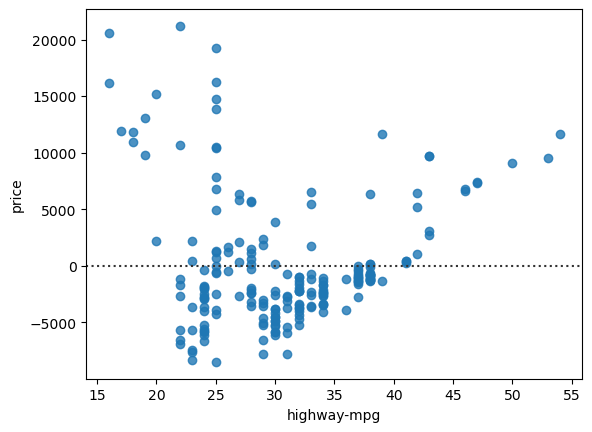

In [12]:
""" RESIDUAL PLOT USING PYTHON LIBRARY SEABORN """

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1.replace('?', np.nan, inplace=True)

df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

sns.residplot(x=df1['highway-mpg'],y=df1['price'])

plt.show()

# OBSERVATION : 
# This case the residulas have a curvature

In [ ]:
""" Simple Linear Regression : Prediction """

# it is hard to figure out how much the car will cost
# if we assume is there a linear relationship between these variables(price vs highway-MPG)
# We can formulate a model to determine the price of an car
# if the highway-mpg is 20 we can input the value to the model
# to option a prediction 22 003 dollar of the car price


![](slr_prediction.jpg)

In [ ]:
""" Simple Linear Regression: FIT """

# in order to determine the line(linear regression) we take the data points in the dataset and marked in red.
# we then use this to trainning points to FIT our model.
# the result of the training points are the parameters (b0,b1)
# we usally store the data points in two dataframes or numpy array
# the values we would like to predict (traget) we store in the array 'y'
# we store the independent varaibles in the dataframe or array 'x'
# each sample corresponds to different rows each dataframe or array


![](slr_fit_line.jpg)

![](slr_fit_line2.jpg)

In [ ]:
# factors influence the price of the car 
# exmaple: make or how old the car is

"""NOISE """
# in this model this uncertainty is taken into account assuming a small random value is added to the point on the line this is
# called noise
# distrubtion of the noise can showed in the below figure 
# vertical axis shows the value added 
# the horizontal axis illustrates the probability that the value will be added
# usually a small positive value is added or a small negative value and sometimes large values are added
# but the most part the values added are near zero


![](noise_figure.jpg)

In [ ]:
""" Summaries the process like this """

# we have the set of training points FIT LINE(b0,b1)
# we use this training points to fit and train the model and get the parameters
# we then use this parameters in the model we have now the model (^y = b0+b1x)
# we use the hat on the ^y to denote that the model as an estimate 
# we can use this model to predict values that we haven't seen

# example : we have no car with 20 highway miles per gallon. we can use our model to make a prediction for the price of this car.
# but don't forget our model is not always correct. we can see this by comparing the predicted value to the actual value.
# we have a sample for 10 highway miles per gallon but the predicted value does not match the actual value 

# NOTE: If the linear assumption is correct this error is due to the noise but there can be other reasons

![](summary_model.jpg)

In [10]:
""" To fit the model in python """
# X: Predictor variable
# Y: Target variable

import pandas as pd
import numpy as np

# replace '?' with NaN
df1.replace('?', np.nan, inplace=True)

# conver the required columns to numeric (this will convert non-numeric values to NaN)
df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors ='coerce')

# handle missing values by replacing them with the mean of the column
df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

#1. import linear_model from scikit-learn
from sklearn.linear_model import LinearRegression

#2. we define the predictor varaible and target variable
X= df1[["highway-mpg"]]
Y= df1[["price"]]

#3. Create a Linear Regression Object using the constructor:
lm=LinearRegression()

# 4. Then use lm.fit(x,y) to fit the model, i.e find the parameters b0 and b1
lm.fit(X,Y)

# 5. We can obtain a prediction using the method predict 
# the out is an array 
Yhat =lm.predict(X)


# output the coefficients and intercept
print(f"slope (b1): {lm.coef_[0][0]}")
print(f"Intercept (b0): {lm.intercept_[0]}")

# output the predicted values
# show first 5 predictions
print("Predicted values (Yhat): ",Yhat[:5])

# We can view the intercept(b0): is an attribute of the object lm
# we can view the slope (b1): is also an attribute of the object lm
# The Relationship between Price and Highway MPG is given by:
# Price =37470.61 - 789.02 * highway-mpg (^y =b0+b1x)

slope (b1): -789.0266198557421
Intercept (b0): 37470.660141383094
Predicted values (Yhat):  [[16166.94140528]
 [16166.94140528]
 [16955.96802513]
 [13799.86154571]
 [20112.07450456]]


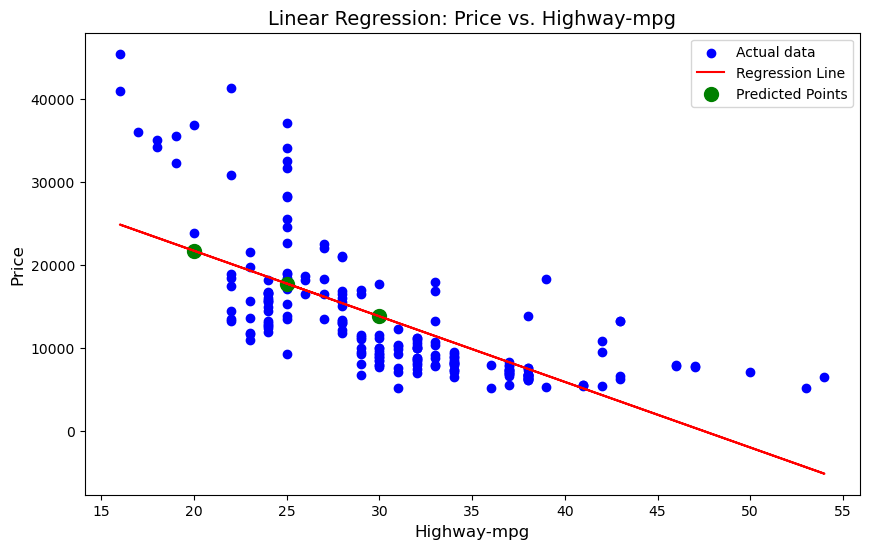

Predicted price for highway-mpg =20: 21690.13
Predicted price for highway-mpg =25: 17744.99
Predicted price for highway-mpg =30: 13799.86


In [3]:
""" predict the car prices for specific values of highway-mpg (such as 20,25,30), plot these points
    on a graph, and visualize the linear regression line along with the predictions.
"""
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# supress warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

df1.replace('?', np.nan, inplace=True)

df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors ='coerce')

df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

X= df1[["highway-mpg"]]
Y= df1[["price"]]

lm=LinearRegression()

lm.fit(X,Y)

# Predict prices for highway-mpg values 20,25, and 30
# new highway-mpg values
# X_new = np.array([[20],[25],[30]])

# to reslove the error
X_new = pd.DataFrame([[20],[25],[30]])
Y_new = lm.predict(X_new)

# Plot the data points and regression line
plt.figure(figsize=(10,6))

# Scatter plot of actual data
plt.scatter(X, Y, color='blue', label='Actual data')

# Plot the regression line for all values of highway-mpg
plt.plot(X, lm.predict(X), color='red', label='Regression Line')

# Plot the predicted values for highway-mpg =20,25,30
plt.scatter(X_new, Y_new, color='green', marker='o', s=100, label='Predicted Points')

# Add labels and title
plt.xlabel("Highway-mpg", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Linear Regression: Price vs. Highway-mpg", fontsize=14)
plt.legend()

# show the plot
plt.show()

# print the predicted prices
for i , mpg in enumerate([20,25,30]):
    print(f"Predicted price for highway-mpg ={mpg}: {Y_new[i][0]:.2f}")
    
    
# fit the model using lm.fit()
# predict the target variable using lm.predict()

    
# error not much import:
# error : /opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:
# X does not have valid feature names, but LinearRegression was fitted with feature names

# occured due to new x-new data you passed for prediction does not contain feature names,
# while the orginal dataframe(x used in lm.fit(x,y) had feature names.: X_new = np.array([[20],[25],[30]]) 

# To resolve this, you can either:
# Use a DataFrame with the same feature name when making predictions, or
# Ignore the warning, as it won’t affect the correctness of the predictions.

# still face the same erro you the "SUPPRESSING THE WARNING BY IMPORTING WARNINGS"


In [ ]:
""" MULTIPLE LINEAR REGRESSION (MLR) """

# This method is used to explain the relationship between: 
#    One continuous targer(Y) variable
#    Two or more predictor (X) variables

# if we have four predictor varaibles:
#    ^y = b0 +b1x1+b2x2+b3x3+b4x4

# b0 : intercept(X=0)
# b1 : the coefficient or parameter of x1
# b2 : the coefficient or parameter of x2
# b3 : the coefficient or parameter of x3
# b4 : the coefficient or parameter of x4

# if have two variables we can consider the values(regression equation) and the corresponding values plotted on a 2D plane.
#    ^y = 1+2x1+3x2

# The variables x1 and x2 can be visualized on a 2D plane.
# example:
# if n=1,(x1,x2) = (0,0), ^y=1+2(0)+3(0): ^y=1
# if n=2,(x1,x2) = (0,2), ^y=1+2(0)+3(2): ^y=6
# if n=3,(x1,x2) = (1,0), ^y=1+2(1)+3(0): ^y=2


![](mlr_equation.jpg)

In [11]:
""" FIT A MULTIPLE LINEAR MODEL ESTIMATOR AS FOLLOWS: """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df1.replace('?', np.nan, inplace=True)

df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['engine-size'] = pd.to_numeric(df1['engine-size'], errors='coerce')
df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors ='coerce')

df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
df1['engine-size'].fillna(df1['engine-size'].mean(), inplace=True)
df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

# We can extract the for 4 predictor variables and store them in the variable X
X = df1[['horsepower', 'curb-weight','engine-size', 'highway-mpg']]
Y = df1['price']

lm=LinearRegression()

# Then train the model as before: using the method train with the features or dependend variables on the targets.
lm.fit(X,Y)

# We can also obtain a prediction: using the method predict
Yhat=lm.predict(X)

# in this case the input is an array or dataframe with four columns
# no of rows corresponds to the no of samples
# the out put is an array with the same no of elements or no of samples

# find the intercept(b0)
print(f"Intercept (b0): {lm.intercept_}")
    
# find the coefficients(b1,b2,b3,b4)

print(f"slope (b1,b2,b3,b4): {lm.coef_}")

# the estimated linear model:
# Price(^y) = bo+b1*horsepower+b2*curb-weight+b3*engine-size+b4*highway-mpg
# ^Y=b0+b1x1+b2x2+b3x3+b4x4

print(f"Estimated Linear Model: Price ={lm.intercept_} + {lm.coef_[0]}*horsepower + {lm.coef_[1]}*curb-weight +{lm.coef_[2]}*engine-size + {lm.coef_[3]}*highway-mpg")

# output the predicted values
print("Predicted values price of the car (Yhat): ",Yhat)



Intercept (b0): -9239.379970934504
slope (b1,b2,b3,b4): [ 18.12178086   3.80596513 101.121117   -65.10968116]
Estimated Linear Model: Price =-9239.379970934504 + 18.121780859934642*horsepower + 3.8059651283689426*curb-weight +101.12111699871414*engine-size + -65.109681163383*highway-mpg
Predicted values price of the car (Yhat):  [1.38575207e+04 1.38575207e+04 1.79731719e+04 1.05724935e+04
 1.59127293e+04 1.44203004e+04 1.57029106e+04 1.61215668e+04
 1.69875504e+04 1.70941698e+04 1.07391063e+04 1.07391063e+04
 1.80283131e+04 1.82376412e+04 1.95367001e+04 2.60539520e+04
 2.66248467e+04 2.72308117e+04 1.13166566e+01 5.46270758e+03
 5.59591636e+03 5.56429531e+03 5.75962435e+03 8.66471450e+03
 6.10596718e+03 6.18969841e+03 6.18969841e+03 8.90449030e+03
 1.23869442e+04 1.82991081e+04 4.11852156e+03 5.88990082e+03
 4.09344646e+03 6.61086133e+03 6.67175677e+03 6.87727889e+03
 6.93056240e+03 9.80393460e+03 1.00056508e+04 1.00627402e+04
 1.03215459e+04 1.12728757e+04 1.04047989e+04 1.04049227e+0

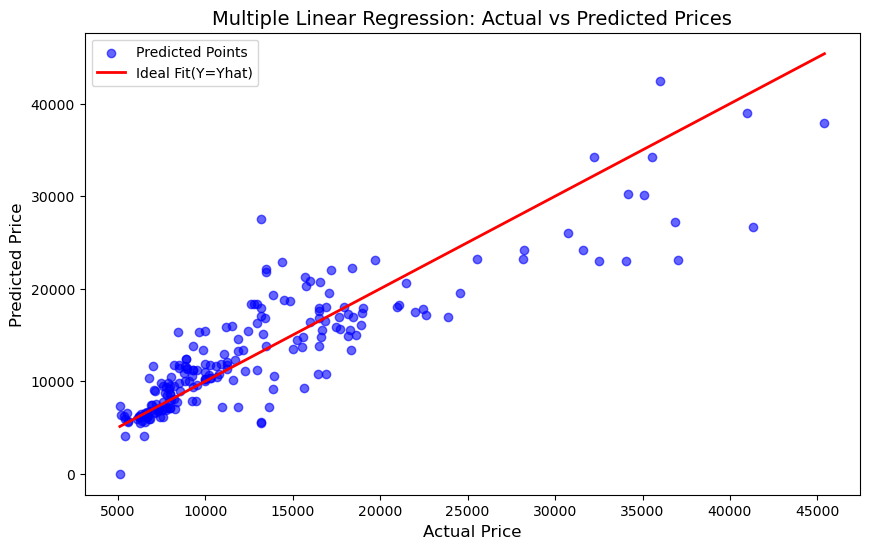

In [12]:
""" To visualize a multiple linear regression model with multiple predictors, plotting directly on a 2d
    graph becomes tricky since the data hass more than two dimensions. however, we can still create a visualizaiton
    where the actual price values are plotted against one of the predictors, and the predicted values(yhat) are marked with
    different colors.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df1.replace('?', np.nan, inplace=True)

df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['engine-size'] = pd.to_numeric(df1['engine-size'], errors='coerce')
df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors ='coerce')

df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
df1['engine-size'].fillna(df1['engine-size'].mean(), inplace=True)
df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

X = df1[['horsepower', 'curb-weight','engine-size', 'highway-mpg']]
Y = df1['price']

lm=LinearRegression()

lm.fit(X,Y)

Yhat=lm.predict(X)

# Plot actual vs predicted prices
plt.figure(figsize=(10,6))

# scatter plot of actual prices(Y) vs. predicted price (Yhat)
plt.scatter(Y, Yhat, color= 'blue', label ='Predicted Points', alpha =0.6)

# Plot a reference line(ideal case: predicted prices = actual prices)
plt.plot([Y.min(), Y.max()],[Y.min(),Y.max()], color= 'red', linewidth=2, label='Ideal Fit(Y=Yhat)')

plt.xlabel('Actual Price' ,fontsize=12)
plt.ylabel('Predicted Price' ,fontsize=12)
plt.title('Multiple Linear Regression: Actual vs Predicted Prices', fontsize=14)
plt.legend()

plt.show()



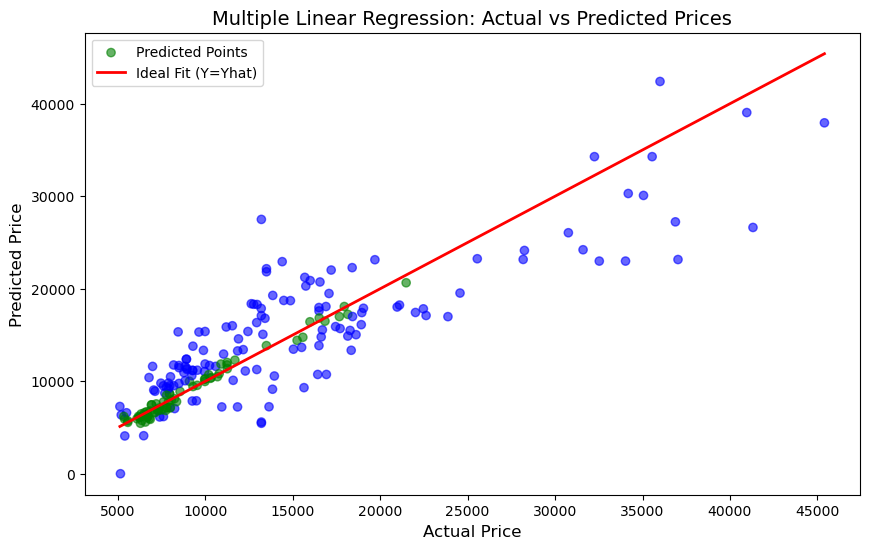

In [13]:
""" To mark the predicted points in green that are interacting(i.e close to) the redline (ideal fit line),
    you can check how close the predicted value(Yhat) is to the actual value(y). if they are within a certain
    tolerance(or threshold), we will color them green; otherwise, they will remain blue.
"""
# tolerance : this defines how clos the predicted values(Yhat) need to be ot the actual value (Y) to be considered as "interacting"
#             with the red line. You can adjust this value based on the scale of your data.

# np.where(): This function checks if the absolute difference between Y and Yhat is less than or equal to the specified tolerance.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Replace '?' with NaN
df1.replace('?', np.nan, inplace=True)

# Convert the relevant columns to numeric and handle missing values
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['engine-size'] = pd.to_numeric(df1['engine-size'], errors='coerce')
df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

# Fill missing values with the mean
df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
df1['engine-size'].fillna(df1['engine-size'].mean(), inplace=True)
df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

# Extract the predictor variables and target variable
X = df1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df1['price']

# Create a Linear Regression object
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Predict prices
Yhat = lm.predict(X)

# Define tolerance for considering a point to be "on" the line
tolerance = 1000  # You can adjust this based on your data

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))

# Points that are within the tolerance are marked in green, others in blue
colors = np.where(np.abs(Y - Yhat) <= tolerance, 'green', 'blue')

# Scatter plot of actual prices (Y) vs. predicted prices (Yhat)
plt.scatter(Y, Yhat, c=colors, label='Predicted Points', alpha=0.6)

# Plot a reference line (ideal case: predicted prices = actual prices) in red
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2, label='Ideal Fit (Y=Yhat)')

# Add labels and title
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Multiple Linear Regression: Actual vs Predicted Prices', fontsize=14)

# Show legend
plt.legend()

# Show the plot
plt.show()


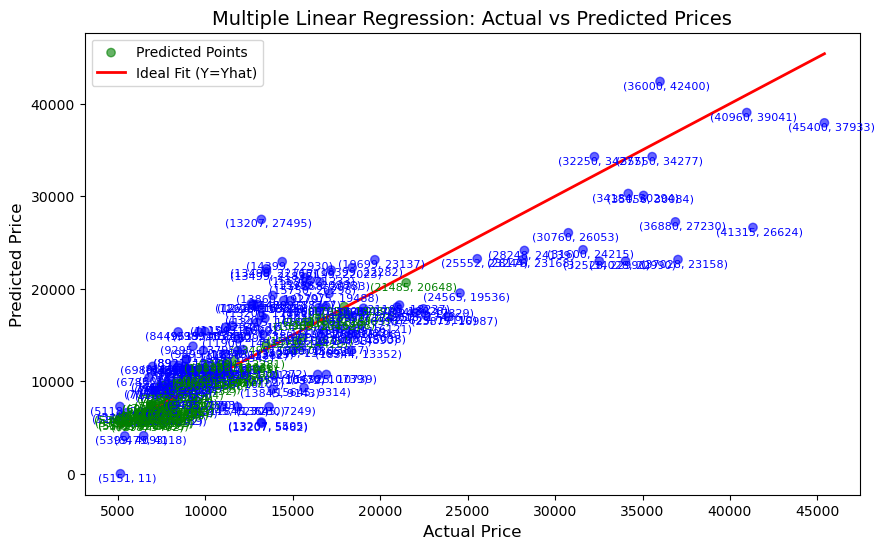

In [16]:
""" To display the values (actual and predicted prices) on the graph, we can use the 'annotate' function
    in Matplotlib to place text labels near each data point. This way, the values of both the actual prices(Y) and 
    pridicted prices (Yhat) can be shown.
"""
# Key modifications.
# 1.plt.annotate(): This function is used to add annotations (text) to specific points on the graph.
# 2.Formatting of labels:
#      The format f'({int(Y.iloc[i])}, {int(Yhat[i]}]' ensures that we display the actual and predicted prices in a readable way.
#      Y.iloc[i] is the actual price, and Yhat[i] is the predicted price.

# 3.Text Offset:
#     xytest=(5, -5) moves the label slightly from the point to avoid overlap.
#     you can adjust these values to better position the text on the graph.

# 4. Font and Color:
# The font size for the labels is set to 8.
# The color of the label text matches the points's color(green or blue).


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Replace '?' with NaN
df1.replace('?', np.nan, inplace=True)

# Convert the relevant columns to numeric and handle missing values
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['engine-size'] = pd.to_numeric(df1['engine-size'], errors='coerce')
df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

# Fill missing values with the mean
df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
df1['engine-size'].fillna(df1['engine-size'].mean(), inplace=True)
df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

# Extract the predictor variables and target variable
X = df1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df1['price']

# Create a Linear Regression object
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Predict prices
Yhat = lm.predict(X)

# Define tolerance for considering a point to be "on" the line
tolerance = 1000  # You can adjust this based on your data

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))

# Points that are within the tolerance are marked in green, others in blue
colors = np.where(np.abs(Y - Yhat) <= tolerance, 'green', 'blue')

# Scatter plot of actual prices (Y) vs. predicted prices (Yhat)
plt.scatter(Y, Yhat, c=colors, label='Predicted Points', alpha=0.6)

# Plot a reference line (ideal case: predicted prices = actual prices) in red
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2, label='Ideal Fit (Y=Yhat)')

# Add labels and title
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Multiple Linear Regression: Actual vs Predicted Prices', fontsize=14)

# Annotate the graph with the actual and predicted values
for i in range(len(Y)):
    plt.annotate(f'({int(Y.iloc[i])}, {int(Yhat[i])})',  # Show actual and predicted price
                 (Y.iloc[i], Yhat[i]),  # Position the annotation near the point
                 textcoords="offset points", xytext=(5,-5),  # Offset the text for readability
                 ha='center', fontsize=8, color=colors[i])  # Text color matches the point

# Show legend
plt.legend()

# Show the plot
plt.show()


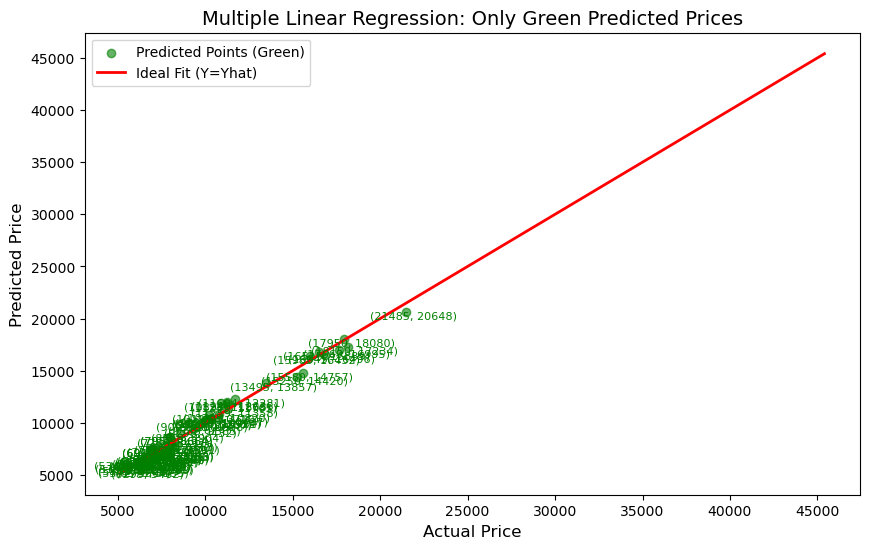

In [17]:
""" modify the code so that only the green predicted values(those clsoe to the red ideal line within the tolerance) are shown
    and the blue predicted values are hidden
"""
# Key Modifications:
# green_mask : This mask filters the data points that meet the tolerance condition (i.e where the difference between Y  and Yhat
# is less than or equal to the tolerance).
# green_mask=np.abs(Y-Yhat) <=tolerance): This creates a boolean array where True corresponds to points that are close enogh to the
# idel line.
#  Then , we use green_mask to filter both Y and Yhat

# Y_filtered and Yhat_filtered: These arrays store the actual and predicted values for points that meet the tolerance condtion(green points)
# No Blue Points: we only plot the green points that satisfy the tolerance condition.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Replace '?' with NaN
df1.replace('?', np.nan, inplace=True)

# Convert the relevant columns to numeric and handle missing values
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['engine-size'] = pd.to_numeric(df1['engine-size'], errors='coerce')
df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

# Fill missing values with the mean
df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
df1['engine-size'].fillna(df1['engine-size'].mean(), inplace=True)
df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

# Extract the predictor variables and target variable
X = df1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df1['price']

# Create a Linear Regression object
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Predict prices
Yhat = lm.predict(X)

# Define tolerance for considering a point to be "on" the line
tolerance = 1000  # You can adjust this based on your data

# Filter only points that are within the tolerance (green points)
green_mask = np.abs(Y - Yhat) <= tolerance
Y_filtered = Y[green_mask]
Yhat_filtered = Yhat[green_mask]

# Plot only the green points (predicted values that are close to the actual values)
plt.figure(figsize=(10, 6))

# Scatter plot of actual prices (Y) vs. predicted prices (Yhat) for green points
plt.scatter(Y_filtered, Yhat_filtered, color='green', label='Predicted Points (Green)', alpha=0.6)

# Plot a reference line (ideal case: predicted prices = actual prices) in red
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2, label='Ideal Fit (Y=Yhat)')

# Add labels and title
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Multiple Linear Regression: Only Green Predicted Prices', fontsize=14)

# Annotate the graph with the actual and predicted values
for i in range(len(Y_filtered)):
    plt.annotate(f'({int(Y_filtered.iloc[i])}, {int(Yhat_filtered[i])})',  # Show actual and predicted price
                 (Y_filtered.iloc[i], Yhat_filtered[i]),  # Position the annotation near the point
                 textcoords="offset points", xytext=(5,-5),  # Offset the text for readability
                 ha='center', fontsize=8, color='green')  # Text color matches the point

# Show legend
plt.legend()

# Show the plot
plt.show()


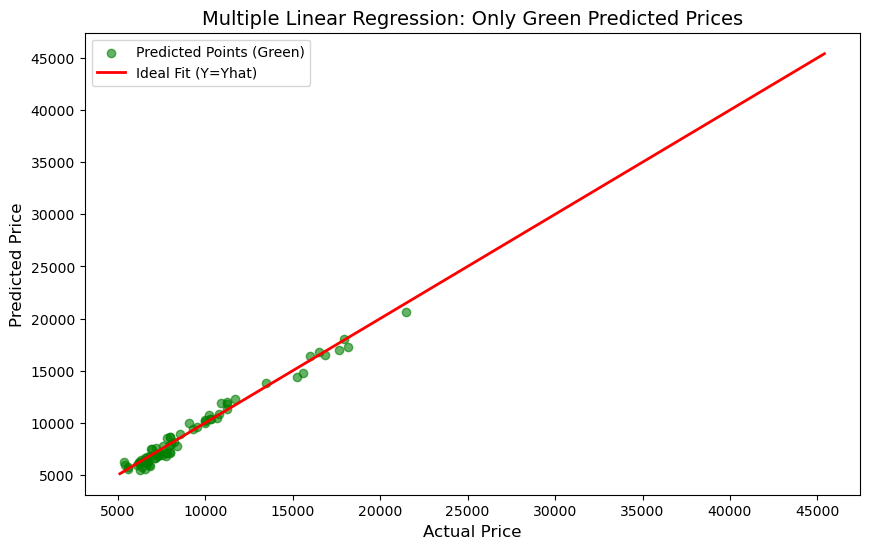

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Replace '?' with NaN
df1.replace('?', np.nan, inplace=True)

# Convert the relevant columns to numeric and handle missing values
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['engine-size'] = pd.to_numeric(df1['engine-size'], errors='coerce')
df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

# Fill missing values with the mean
df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
df1['engine-size'].fillna(df1['engine-size'].mean(), inplace=True)
df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

# Extract the predictor variables and target variable
X = df1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df1['price']

# Create a Linear Regression object
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Predict prices
Yhat = lm.predict(X)

# Define tolerance for considering a point to be "on" the line
tolerance = 1000  # You can adjust this based on your data

# Filter only points that are within the tolerance (green points)
green_mask = np.abs(Y - Yhat) <= tolerance
Y_filtered = Y[green_mask]
Yhat_filtered = Yhat[green_mask]

# Plot only the green points (predicted values that are close to the actual values)
plt.figure(figsize=(10, 6))

# Scatter plot of actual prices (Y) vs. predicted prices (Yhat) for green points
plt.scatter(Y_filtered, Yhat_filtered, color='green', label='Predicted Points (Green)', alpha=0.6)

# Plot a reference line (ideal case: predicted prices = actual prices) in red
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2, label='Ideal Fit (Y=Yhat)')

# Add labels and title
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Multiple Linear Regression: Only Green Predicted Prices', fontsize=14)

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
""" MODEL EVALUATION USING VISUALIZATION """

# REGRESSION PLOT:
# Why use regression plot?
# It gives us a good estimate of:
# 1. The relationship between two variables
# 2. The strength of the correlation
# 3. The direction of the relationship (positive or negative)

# Regression Plot shows us a combination of:
# The scatterplot: where each point represents a different y
# The fitted linear regression line (^y)


In [ ]:
""" steps and suggest some improvement to strengthen MULTIPLE LINEAR REGRESSION model-building process """

# STEP1: CORRELATION BETWEEN VARIABLES

# TARGET VARIABLE HERE: 'Price'
# INDEPENDENT VARIABLE: 'horsepower','curb-weight',engine-size' and 'highway-mpg'
# CORRELATION METHOD: you have continous variables you can go with Pearson correlation.
# VISUALIZATION: you can use a heatmap to visualize the correlations between the variables and target.

horsepower vs price:
Pearson Correlation Coefficient: 0.7579169537498174
P-value: 1.6076703978131317e-39
curb-weight vs price:
Pearson Correlation Coefficient: 0.8208247333547292
P-value: 2.866332107026707e-51
engine-size vs price:
Pearson Correlation Coefficient: 0.8617522436859723
P-value: 9.66966192363295e-62
highway-mpg vs price:
Pearson Correlation Coefficient: -0.6905257341183485
P-value: 2.232467405837566e-30


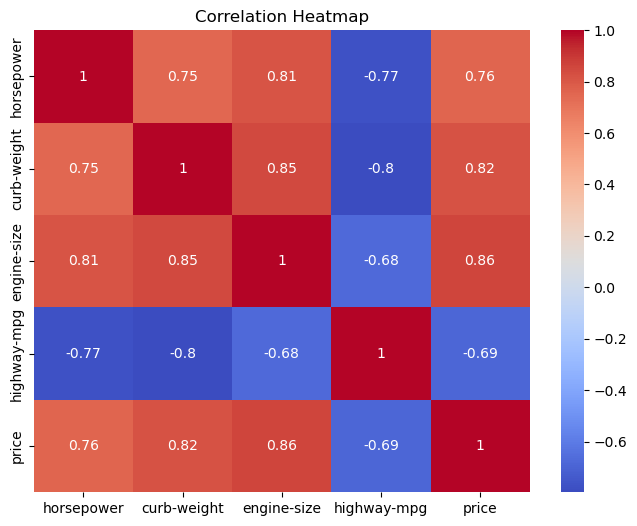

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# Replace '?' with NaN
df1.replace('?', np.nan, inplace=True)

# Convert the relevant columns to numeric and handle missing values
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['engine-size'] = pd.to_numeric(df1['engine-size'], errors='coerce')
df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

# Fill missing values with the mean
# df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
# df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
# df1['engine-size'].fillna(df1['engine-size'].mean(), inplace=True)
# df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)

# or you can use method for fill the missing values
columns_to_fill = ['horsepower', 'curb-weight' ,'engine-size', 'highway-mpg','price']
for col in columns_to_fill:
#   Replace infinite values with NaN
    df1[col].replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle infinite values
#   Fill any remaining NaNs with the column mean 
    df1[col].fillna(df1[col].mean(),inplace=True)
    
X = df1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df1['price']
    
# Calculate Pearson correlation matrix
correlation_matrix = df1[['horsepower', 'curb-weight' ,'engine-size', 'highway-mpg', 'price']].corr(method= 'pearson')

# pearson coefficient and P-vales for each variables
# for multple variables you have to use the stats.pearsonr like this
variables = ['horsepower', 'curb-weight' ,'engine-size', 'highway-mpg']
target_variable= 'price' 
for var in variables:
    pearson_coef, p_value = stats.pearsonr(df1[var],df1[target_variable])
    print(f"{var} vs {target_variable}:")
    print(f"Pearson Correlation Coefficient: {pearson_coef}")
    print(f"P-value: {p_value}")

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot =True, cmap ='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# INTERPRETATION:
# Look for variables that show a high correlation with the target variable(price). These will be good predictors in your model
# If some variables have very low correlation, you may choose to exclude them.

# correlation coefficient and P-value for 'highway-size vs price': 
# Pearson Correlation Coefficient:
# Value: -0.69
# This indicates a moderately strong negative correlation between highway-mpg and price.
# Interpretation: As highway-mpg increases (i.e., the car is more fuel-efficient), the price tends to decrease.
# The negative sign reflects this inverse relationship.

# P-value:
# Value: 2.23×10⁻³⁰ (or 2.232467405837566e-30)
# This is an extremely small p-value, far smaller than any common significance level (e.g., 0.05 or 0.01).
# Interpretation: This p-value indicates that the relationship between highway-mpg and price is statistically significant. 
# There’s a very strong indication that this correlation is not due to random chance.

# Conclusion:
# Since the Pearson correlation coefficient shows a moderate negative correlation and the p-value is extremely small, 
# you can keep highway-mpg as an important variable in your multiple linear regression model. It has a significant effect 
# on predicting the price of a car.

# Removing it would likely reduce the predictive power of your model because it is clearly related to the target variable (price).
# Therefore, it's better to consider this variable in the model.

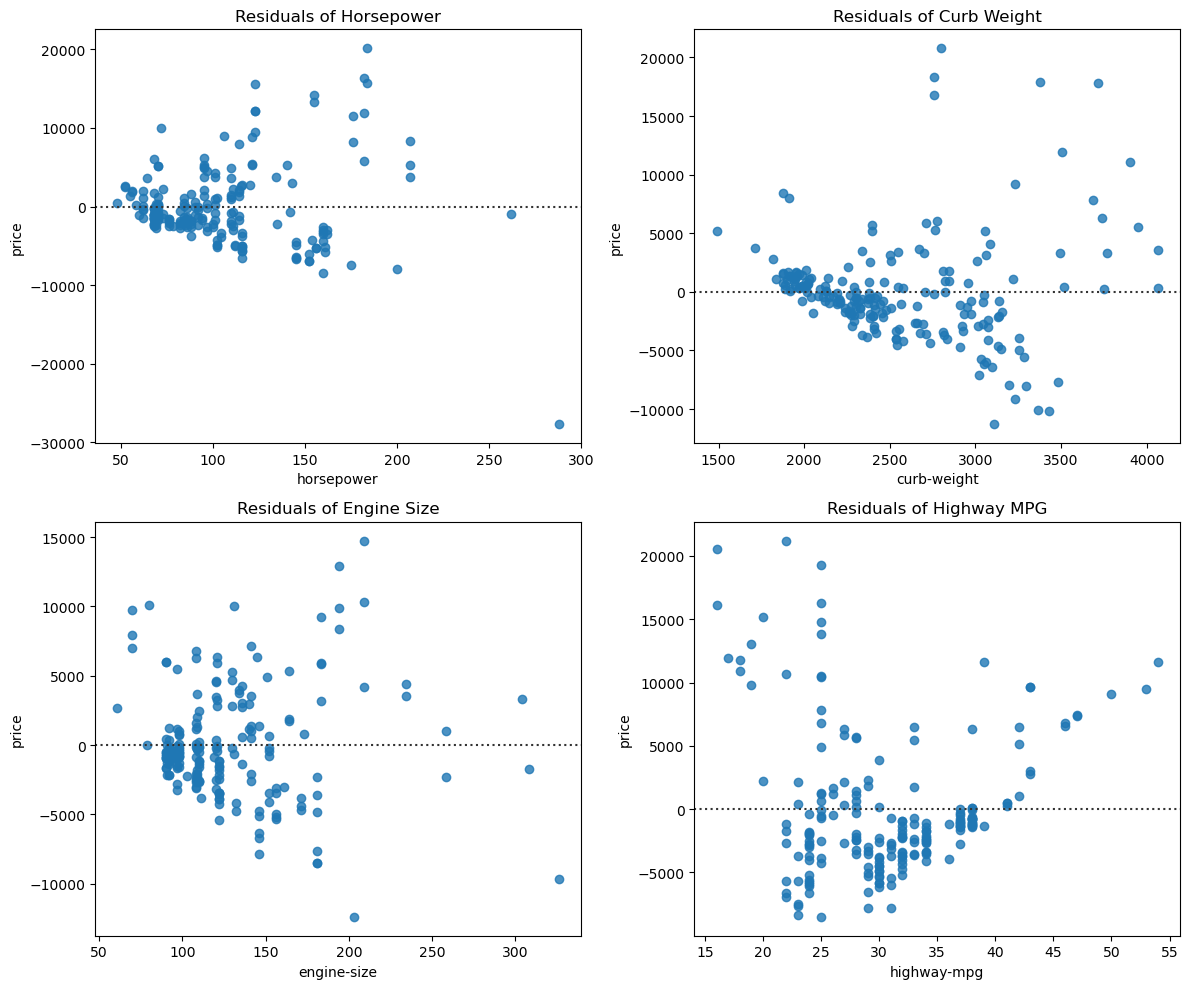

In [13]:
# STEP2 : Residual Plot and Conclusion
# residual plots help identify whether the relationship between the independent variables and the target variable is linear.

# residual plot for each predictor
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.residplot(x=df1['horsepower'],y=Y, ax=axes[0,0])
sns.residplot(x=df1['curb-weight'],y=Y, ax=axes[0,1])
sns.residplot(x=df1['engine-size'],y=Y, ax=axes[1,0])
sns.residplot(x=df1['highway-mpg'],y=Y, ax=axes[1,1])

axes[0,0].set_title('Residuals of Horsepower')
axes[0,1].set_title('Residuals of Curb Weight')
axes[1,0].set_title('Residuals of Engine Size')
axes[1,1].set_title('Residuals of Highway MPG')

plt.tight_layout()
plt.show()

# Conclusion:
# If the residuals are randomly scattered around zero, it indicates a linear relationship between the predictor and the target.
# If you observe a pattern (e.g., funnel-shaped spread), there may be non-linearity, and you might consider transforming that 
# variable (e.g., taking the log).


Intercept (b0): -9239.379970934504
Coefficient (b1,b2,b3,b4): [ 18.12178086   3.80596513 101.121117   -65.10968116]
Estimated Linear Model: Price = -9239.379970934504 + 18.121780859934642*horsepower + 3.8059651283689426*curb-weight + 101.12111699871414*engine-size + -65.109681163383*highway-mpg

 Predicted prices for the first 5 samples:
sample1:predicted Price =13857.52
sample2:predicted Price =13857.52
sample3:predicted Price =17973.17
sample4:predicted Price =10572.49
sample5:predicted Price =15912.73


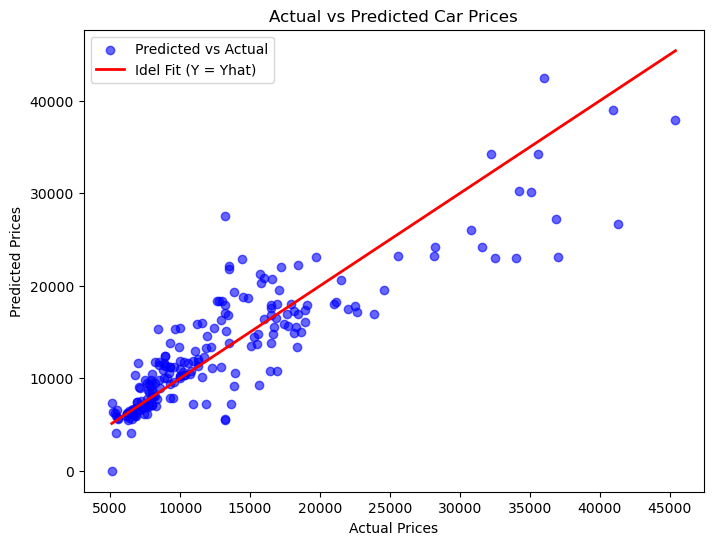

In [14]:
# STEP 3: FIT MULTIPLE LINEAR REGRESSION MODEL
# this is now fitting the multiple linear regression model is good. here's how you can improve it and visualize the predictions.

# Create a Linear Regression object
lm = LinearRegression()

# Fit the model
lm.fit(X,Y)

# Predit values
Yhat = lm.predict(X)

# intercept and coefficients
print(f"Intercept (b0): {lm.intercept_}")
print(f"Coefficient (b1,b2,b3,b4): {lm.coef_}")

# Estimated Linear Model
print(f"Estimated Linear Model: Price = {lm.intercept_} + {lm.coef_[0]}*horsepower + {lm.coef_[1]}*curb-weight + {lm.coef_[2]}*engine-size + {lm.coef_[3]}*highway-mpg")

# Calculate the predicted price for the first 5 samples
predicted_prices = lm.predict(X[:5])
print("\n Predicted prices for the first 5 samples:")
for i,price in enumerate(predicted_prices,1):
    print(f"sample{i}:predicted Price ={price:.2f}")
    
    
# Plot predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(Y, Yhat, color ='blue', alpha=0.6, label ='Predicted vs Actual')
plt.plot([Y.min(), Y.max()],[Y.min(),Y.max()], color='red', linewidth=2, label='Idel Fit (Y = Yhat)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.show()

# Visualization:
# Scatter plot: Shows how well the predicted values align with the actual values. Ideally, points should be close to the red line (Y = Yhat).
# Interpretation: If the points are close to the red line, your model is predicting well. If there’s a lot of deviation, it may indicate underfitting 
# or that additional features or transformations are needed.

# Further Suggestions:
# Feature Engineering: You might explore interaction terms or polynomial terms if non-linearity is observed.
# Standardization: If your variables have different units, you may consider scaling them (using StandardScaler) 
# to improve model performance.
# Model Evaluation: Use metrics like R², MAE, or MSE to evaluate the model performance.

In [ ]:
""" DISTRIBUTION PLOTS /KDEPLOT"""
# Counts the predicted values vs actual values
# These plots extermely useful for visualizing models with more than one independent variable or feature
# we exaim the vertical axis and we then count and plot the no of predicted points equal to 1 and 2 then we repeat the process
# values of the target and predicted values are contineous
# a histogram is for discrete values therefore pandas will convert them to a distribution
# The vertical axis is scaled to make the are under the distribution equal to one

![](distribution_plots.jpg)

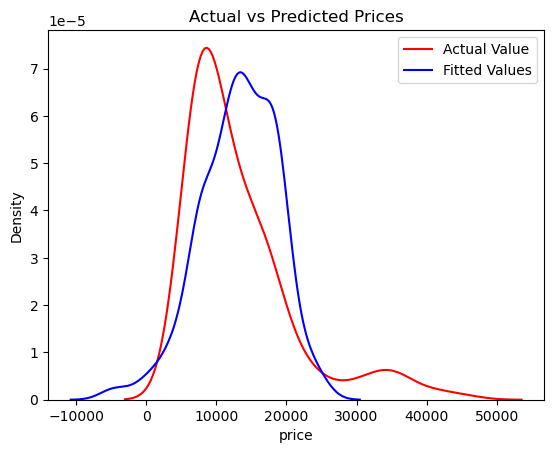

In [15]:
# example to create a distribution plot
# we want a distributin instead of a histogram so we set hist parameter set to false
# 

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df1.replace('?', np.nan, inplace=True)

df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

# alway make X 2D by suing double brackets
X=df1[['highway-mpg']]
Y=df1['price']

lm = LinearRegression()

lm.fit(X,Y)

Yhat = lm.predict(X)

# if you use distplot() is deprecated and will be removed in future versions of Seaborn, you can replace it with kdeplto()
# ax1 = sns.distplot(df1['price'], hist=False, color='r', label='Actual Value')
# sns.distplot(Yhat, hist=False, color='b', label="Fitted Values", ax=ax1)

ax1 = sns.kdeplot(df1['price'], color='r', label='Actual Value')

sns.kdeplot(Yhat,color='b', label="Fitted Values", ax=ax1)

plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

# observation
# the region from 10k to 20k is much closer to the target values
# the predicted price in the region 40k to 50k is inaccurate

![](distribution_plot_example.jpg)

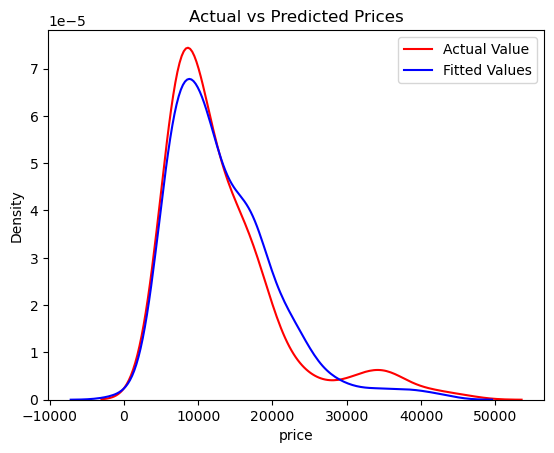

In [16]:
""" For MULTIPLE PREDICTORS """

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Clean the dataset by replacing '?' with NaN and converting columns to numeric
df1.replace('?', np.nan, inplace=True)

df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['engine-size'] = pd.to_numeric(df1['engine-size'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

# Fill missing values with the mean of the respective columns
df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
df1['engine-size'].fillna(df1['engine-size'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

# Define the predictor variables (X) and the target variable (Y)
X = df1[['highway-mpg', 'horsepower', 'curb-weight', 'engine-size']]  # Multiple predictors
Y = df1['price']

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, Y)

# Predict values using the fitted model
Yhat = lm.predict(X)

# Plot actual vs predicted values using seaborn kdeplot
ax1 = sns.kdeplot(df1['price'], color='r', label='Actual Value')
sns.kdeplot(Yhat, color='b', label="Fitted Values", ax=ax1)

# Display the plot
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


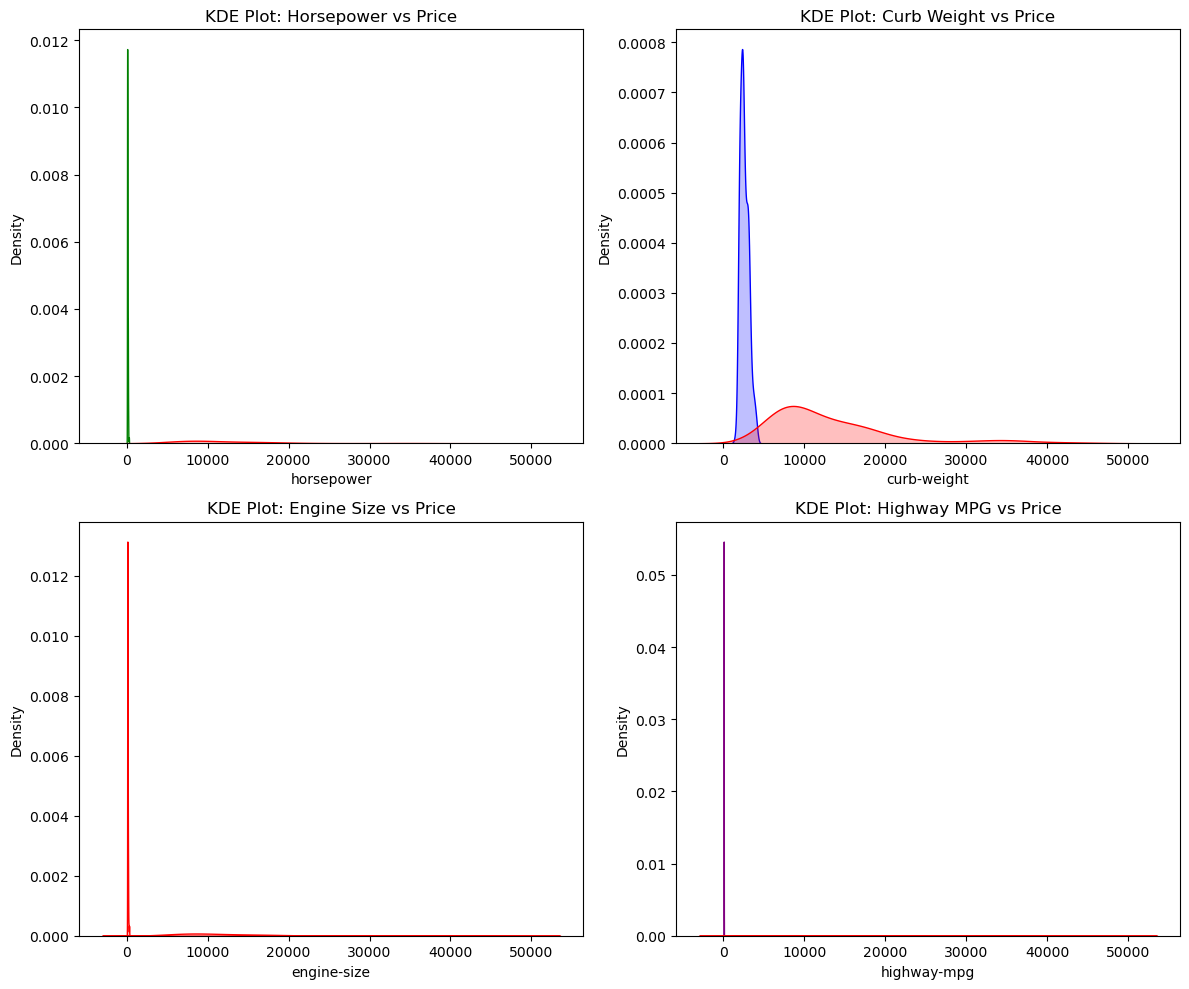

In [33]:
""" using subplots for comparision of individual variabels """
# kdeplot() KDE (Kernel Density Estimation) plots for each predictor againtst price


# Create subplots for each predictor vs price in distribution (kde) plot
fig, axes = plt.subplots(2,2,figsize=(12,10))

# KDE plots for each predictor vs price
sns.kdeplot(df1['horsepower'], fill=True, color="g", ax=axes[0, 0], label="Horsepower")
sns.kdeplot(df1['price'], fill=True, color="r", ax=axes[0, 0], label="Price")
axes[0, 0].set_title('KDE Plot: Horsepower vs Price')

sns.kdeplot(df1['curb-weight'], fill=True, color="b", ax=axes[0, 1], label="Curb Weight")
sns.kdeplot(df1['price'], fill=True, color="r", ax=axes[0, 1], label="Price")
axes[0, 1].set_title('KDE Plot: Curb Weight vs Price')

sns.kdeplot(df1['engine-size'], fill=True, color="r", ax=axes[1, 0], label="Engine Size")
sns.kdeplot(df1['price'], fill=True, color="r", ax=axes[1, 0], label="Price")
axes[1, 0].set_title('KDE Plot: Engine Size vs Price')

sns.kdeplot(df1['highway-mpg'], fill=True, color="purple", ax=axes[1, 1], label="Highway MPG")
sns.kdeplot(df1['price'], fill=True, color="r", ax=axes[1, 1], label="Price")
axes[1, 1].set_title('KDE Plot: Highway MPG vs Price')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


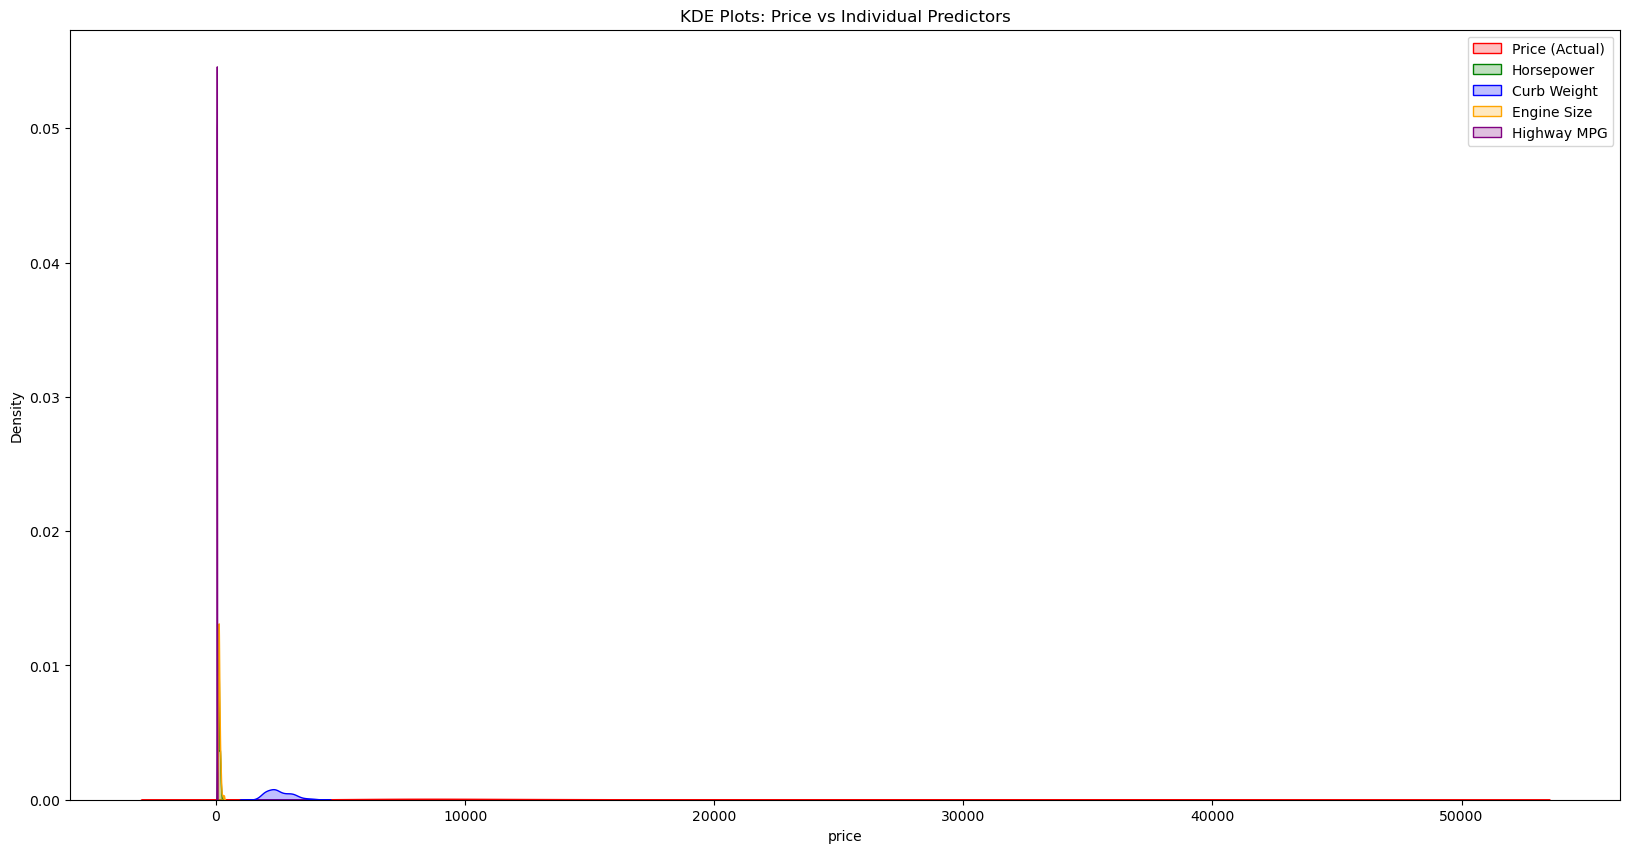

In [37]:
""" PLOT INDIVIDUAL PREDICTORS VS PRICE USING KDE: """

# set the size of the plot
# width,height
plt.figure(figsize=(20,10)) 

# Create a KDE plot for each predictor vs price on the same axes
sns.kdeplot(df1['price'], color='r', label='Price (Actual)', fill=True)
sns.kdeplot(df1['horsepower'], color='g', label='Horsepower', fill=True)
sns.kdeplot(df1['curb-weight'], color='b', label='Curb Weight', fill=True)
sns.kdeplot(df1['engine-size'], color='orange', label='Engine Size', fill=True)
sns.kdeplot(df1['highway-mpg'], color='purple', label='Highway MPG', fill=True)

# Customize the plot
plt.title('KDE Plots: Price vs Individual Predictors')
plt.legend()
plt.show()


In [38]:
""" Code using Plotly to generate KDE-LIKE density plot: """

# ploty to create and visualize KDE-like density plots in an interactive format that can be saved and previewed offline as an 
# "HTML file'
# ploty provides ploty.offline.plot to generate HTML file.
# you can use ploty.express or ploty.graph_objects to create interactive density plots.

# However, plots doesn't have a direct kdeplot fuction like seaborn. instead, you can use ploty's histogram with the histnorm ='density'
# option or plotly.express's density_contour or density_heatmap functions to simulate a KDE plot.

# go.Histogram is used with histnorm='density' to simulate a density plot for each variable.
# The barmode='overlay' makes sure the histograms are overlaid on top of each other.
# plot(fig, filename='density_plot.html') generates an offline interactive HTML file that you can open in a browser.

import plotly.graph_objects as go
from plotly.offline import plot
import pandas as pd

# Define data (assuming df1 is already loaded)
x_price = df1['price']
x_horsepower = df1['horsepower']
x_curb_weight = df1['curb-weight']
x_engine_size = df1['engine-size']
x_highway_mpg = df1['highway-mpg']

# Create traces for each predictor vs price
trace1 = go.Histogram(x=x_price, histnorm='density', name='Price (Actual)', opacity=0.5)
trace2 = go.Histogram(x=x_horsepower, histnorm='density', name='Horsepower', opacity=0.5)
trace3 = go.Histogram(x=x_curb_weight, histnorm='density', name='Curb Weight', opacity=0.5)
trace4 = go.Histogram(x=x_engine_size, histnorm='density', name='Engine Size', opacity=0.5)
trace5 = go.Histogram(x=x_highway_mpg, histnorm='density', name='Highway MPG', opacity=0.5)

# Create layout
layout = go.Layout(
    title='Density Plot: Price vs Individual Predictors',
    xaxis=dict(title='Values'),
    yaxis=dict(title='Density'),
    bargap=0.2,
    barmode='overlay'
)

# Combine the traces
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5], layout=layout)

# Generate the plot and save it as an offline HTML file
plot(fig, filename='density_plot.html')


'density_plot.html'

In [ ]:
""" POLYNOMINAL REGRESSION AND PIPELINES """

# What we do when a linear model is not fit for our data

# Polynominal is another type of regression model

# we transfer our data into POLYNOMIAL and then use linear regression fit the parameter

# PIPELINES is the way to simplfy your code

# PLOYNOMIAL REGRESSIONS: A special case of the general linear regression model

# useful for describing curvilinear relationships

# what is Curvilinear relationships: By squaring or setting higher-order terms of the predictor variables



![](curvilinear_relationship.jpg)

In [ ]:
# example for Curvilinear model or POLYNOMINAL REGRESSION:

#  model can be quadratic -2nd order
# ^y=b0+b1x1+b2(x1)^2

# Cubic-3rd order
# ^y=b0+b1x1+b2(x1)^2+b3(x1)^3

# Higher order
# ^y=b0+b1x1+b2(x1)^2+b3(x1)^3+...

# look for the graphs how much the graph changes when we change the order of the polynomial regression
# Degree of the regression makes big difference and can result in the better fit if you pick the right values

# in all cases the relationship between the parameter and variable is always linear



![](polynomial_regression.jpg)

In [10]:
""" Generating a Polynomial Regression of 3rd order """

# in python we do this by polyfit functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df1.replace('?', np.nan, inplace=True)

df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

# alway make X 2D by suing double brackets
X=df1[['highway-mpg']]
Y=df1['price']

lm = LinearRegression()
lm.fit(X,Y)

# np.ployfit() expect X and Y to be 1D arrays, but X is currently a 2D array
# Flatter X for polynomial fitting
X_flat=X.values.flatten()

# Perfomr 3rd degree polynomial fit
f=np.polyfit(X_flat,Y,3)
p=np.poly1d(f)

print(p)

# symbolic form for the model given by the following expression

#         3         2
# -1.641 x + 213.4 x - 9226 x + 1.402e+05


        3         2
-1.641 x + 213.4 x - 9226 x + 1.402e+05


In [8]:
""" Multi Dimensional Polynomial Linear regression """
# Polynomial Regression with more than One Dimension or multi dimensional polynomial linear regression

# ^y = b0+b1x1+b2x2+b3x1x2+b4(x1)^2+b5(x2)^2+...

# some are the terms of 2 dimensional 2 order polynomial

# numpy polyfit() funtion cann't perform the above type of the regression

# We use the 'preprocessing' library in scikit-learn to create a polynomial features object and the constructer the
# degree of the polynomial as a parameter

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

df1.replace('?', np.nan, inplace=True) 

df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)

X = df1[['horsepower', 'curb-weight']] 
Y = df1['price']

# pr is the constructor
pr=PolynomialFeatures(degree=2, include_bias=False)

# Then we transform the features into a polynomialfeatures with the fit_transform() method
# the output will be the transformed version of the original features
x_polly=pr.fit_transform(X[['horsepower', 'curb-weight']])

print(x_polly)
                         

[[1.1100000e+02 2.5480000e+03 1.2321000e+04 2.8282800e+05 6.4923040e+06]
 [1.1100000e+02 2.5480000e+03 1.2321000e+04 2.8282800e+05 6.4923040e+06]
 [1.5400000e+02 2.8230000e+03 2.3716000e+04 4.3474200e+05 7.9693290e+06]
 ...
 [1.3400000e+02 3.0120000e+03 1.7956000e+04 4.0360800e+05 9.0721440e+06]
 [1.0600000e+02 3.2170000e+03 1.1236000e+04 3.4100200e+05 1.0349089e+07]
 [1.1400000e+02 3.0620000e+03 1.2996000e+04 3.4906800e+05 9.3758440e+06]]


In [5]:
# Pre-Processing
# as the dimension of the data gets larger we may wants to normalize multiple features in sickit-learn
# instead we can use pre-processing module to simplify many tasks 

# example:
import pandas as pd
import numpy as np
# we can normalize the each feature simultaneously
# we import StandarScaler
from sklearn.preprocessing import StandardScaler

# Sample data
df1 = {'horsepower': [130, 165, 150, 140, 120],
        'highway-mpg': [27, 25, 26, 24, 30]}

# Convert to DataFrame
x_data = pd.DataFrame(df1)

# train the object(StandardScaler())
SCALE=StandardScaler()
SCALE.fit(x_data[['horsepower', 'highway-mpg']])

# then transform the data into a new array x_scale
x_scale=SCALE.transform(x_data[['horsepower', 'highway-mpg']])

# Display the original and scaled data
print("Original Data:\n",x_data)
print("\nScaled Data:\n",x_scale)

# NOTE: there are more normalization is available in preprocessing library as well as other transformations




Original Data:
    horsepower  highway-mpg
0         130           27
1         165           25
2         150           26
3         140           24
4         120           30

Scaled Data:
 [[-0.70420284  0.29138576]
 [ 1.53644256 -0.6799001 ]
 [ 0.57616596 -0.19425717]
 [-0.06401844 -1.16554303]
 [-1.34438724  1.74831455]]


In [10]:
""" PIPELINES """

# we can simplfy our code using pipelines libraries

# There are many steps to getting a prediction
# Normalization 
# Polynomial transform
# Linear Regression

# we simplify the process using the pipeline
# Pipeline sequentially perform a serious of TRANSFORMATIONS
# The last step carries our PREDICTION

# all the model we need 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
# now we import the library Pipeline
from sklearn.pipeline import Pipeline

df1.replace('?', np.nan, inplace=True)

df1['highway-mpg'] = pd.to_numeric(df1['highway-mpg'], errors='coerce')
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')
df1['engine-size'] = pd.to_numeric(df1['engine-size'], errors='coerce')
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')

df1['highway-mpg'].fillna(df1['highway-mpg'].mean(), inplace=True)
df1['horsepower'].fillna(df1['horsepower'].mean(), inplace=True)
df1['curb-weight'].fillna(df1['curb-weight'].mean(), inplace=True)
df1['engine-size'].fillna(df1['engine-size'].mean(), inplace=True)
df1['price'].fillna(df1['price'].mean(), inplace=True)


X = df1[['highway-mpg', 'horsepower', 'curb-weight', 'engine-size']] 
Y = df1['price']

# we create the list of tuples
# first element in the tuple contains the name of the estimator
# second element contains model constructor
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode', LinearRegression())]
                                    
# we input the Input list to pipeline constructor
# now we have an 'pipe' object
Pipe=Pipeline(Input)


# we can train the pipeline by applying the train method to Pipe object 
# also we can predict the prediction aswell
                            
Pipe.fit(X,Y)

yhat=Pipe.predict(X)

print("Predicted Values:", yhat)


print("covered till Pipeline library")


Predicted Values: [13352.41381686 13352.41381686 18145.17619115 10727.28413064
 15990.35212443 13723.88959354 15000.88981647 15466.98264679
 18623.55503581 18430.18242976 10736.21351112 10736.21351112
 16159.29446312 16314.24693835 18560.67630928 25750.18689379
 25025.70054212 26681.3245071   6630.09575491  6914.06697346
  6862.16060083  6724.45133066  6316.16489993 10687.09017981
  6475.92031717  6517.03345225  6517.03345225 10530.44705553
 10951.71093104 19134.06720884  7379.60995229  7216.28687115
  5917.76684467  6725.27008311  6754.2748784   6855.95358341
  6883.26862332  8930.91525662  9058.31836739  9095.39788102
  9269.14690583 11050.12497431 10420.77588136  8402.91533176
  6914.06697346  6862.16060083 11925.08375681 36241.98197167
 36241.98197167 41391.04579168  4385.45429925  6388.51800864
  6397.76075186  6473.50627904  6483.19991761 10206.06859595
 10206.06859595 10197.14479516 16171.15583398  9974.51272186
 10108.25530707  9974.51272186 10108.25530707 11098.97658167
 10189